In [ ]:
#!pip uninstall NDETCStemmer

In [ ]:
# %pip install git+https://github.com/kaenova/NDETCStemmer.git@master

In [ ]:

# %pip install numpy
# %pip install nltk
# %pip install python-crfsuite
# %pip install PySastrawi
# %pip install --upgrade --no-cache-dir gdown
# %pip install scikit-learn
# %pip install pandas
# %pip install gensim
# %pip install ipython

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\josep\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\josep\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for pdpbox, since package 'wheel' is not installed.
Using legacy 'setup.py install' for matplotlib, since package 'wheel' is not installed.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:


In [ ]:
import sklearn
import nltk
import pandas as pd
import numpy as np
import re
import gensim
import zipfile
from zipfile import ZipFile
#import NDETCStemmer

In [ ]:
for library in [sklearn, nltk, pd, np, re, gensim]:
    print(library.__name__ ,library.__version__)

sklearn 1.2.2
nltk 3.8.1
pandas 1.5.3
numpy 1.24.2
re 2.2.1
gensim 4.3.1


# Data Pre Processing

In [ ]:
#https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset
import urllib
urllib.request.urlretrieve("https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/archive/refs/heads/master.zip","Indonesian-Twitter-Emotion-Dataset.zip")
urllib.request.urlretrieve("https://github.com/ir-nlp-csui/idn-tagged-corpus-CSUI/archive/refs/heads/master.zip","idn-tagged-corpus-CSUI.zip")
urllib.request.urlretrieve("https://github.com/masdevid/ID-Stopwords/archive/refs/heads/master.zip","ID-Stopwords.zip")
urllib.request.urlretrieve("https://github.com/fajri91/InSet/archive/refs/heads/master.zip","InSet.zip")



('InSet.zip', <http.client.HTTPMessage at 0x2113efad580>)

In [ ]:
# !unzip -o /content/idn-tagged-corpus-CSUI.zip
# !unzip -o /content/Indonesian-Twitter-Emotion-Dataset.zip
# !unzip -o /content/ID-Stopwords.zip
# !unzip -o InSet.zip

for i in ["idn-tagged-corpus-CSUI.zip", "Indonesian-Twitter-Emotion-Dataset.zip", "ID-Stopwords.zip", "InSet.zip"]:
    with ZipFile(i, "r") as zipfile:
        zipfile.extractall()


In [ ]:
# Data tweet
raw_tweets =  pd.read_csv("Indonesian-Twitter-Emotion-Dataset-master/Twitter_Emotion_Dataset.csv", sep=",")
#Data kamus salah ketik
dicts = pd.read_csv("Indonesian-Twitter-Emotion-Dataset-master/kamus_singkatan.csv",header=None, index_col=False)

In [ ]:
raw_tweets

In [ ]:
raw_tweets["label"].unique()

array(['anger', 'happy', 'sadness', 'love', 'fear'], dtype=object)

In [ ]:
raw_tweets.groupby("label").size()

label
anger      1101
fear        649
happy      1017
love        637
sadness     997
dtype: int64

In [ ]:
np.std([raw_tweets.groupby("label").size()])

196.82926611660167

In [ ]:
dicts

0
0         aamiin;amin 
1           adek;adik 
2         adlh;adalah 
3             aer;air 
4     aiskrim;es krim 
...                ...
1304           yoi;iya
1305           yup;ya 
1306           yups;ya
1307           yupz;ya
1308     ywdh;ya sudah

[1309 rows x 1 columns]

In [ ]:
dicts[0] =dicts[0].str.strip()

In [ ]:
dicts[0].str.split(";")[1][0:-1]

['adek']

In [ ]:
# Mengubah data menjadi tipe data dictionary
dicts_dict=dict(dicts[0].str.split(";").tolist())
dicts_dict

## Lower the case and Replace typo

In [ ]:
raw_tweets["tweet_prep"] = raw_tweets["tweet"].str.lower()
raw_tweets["tweet_prep"] = raw_tweets["tweet_prep"].replace({fr"\b{re.escape(k)}\b" : v for k,v in dicts_dict.items()}, regex=True)

raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  
0     soal jalan jatibaru,polisi tidak bisa gertak g...  
1     sesama cewek lho (kayaknya), harusnya bisa leb...  
2     kepingin gudeg mbarek bu hj. amad foto dari go...  
3     jalan jatibaru,bagian dari wilayah tn abang.pe...  
4     sharing pengalaman saja, kemarin jam 18.00 bat...  
...                                                 ...  
4396  tahukah kamu, bahwa saat itu papa memejamkan m...  
4397  sulitnya menetapkan calon wapresnya jokowi di ...  
4398  5. masa depannya tidak jelas. lha iya, gimana ...  
4399  [username] dulu benar ada mahasiswa teknik ui ...  
4400  ya allah, hanya engkau yang mengetahui rasa sa...  

[4401 rows x 3 columns]

### Stopword filtering

In [ ]:

with open("ID-Stopwords-master\id.stopwords.02.01.2016.txt", "r") as stopword_file:
    stopword = {i : "" for i in stopword_file.read().split("\n")}
    raw_tweets["tweet_prep"] = raw_tweets["tweet_prep"].replace({fr"\b{re.escape(k)}\b" : v for k,v in stopword.items()}, regex=True)
    raw_tweets["tweet_prep"] = raw_tweets["tweet_prep"].replace({r"\d+" : v for k,v in stopword.items()}, regex=True)
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  
0      jalan jatibaru,polisi   gertak gubernur .eman...  
1      cewek lho (kayaknya),    rasain    sibuk jaga...  
2     kepingin gudeg mbarek bu hj. amad foto  google...  
3     jalan jatibaru,  wilayah tn abang.pengaturan w...  
4     sharing pengalaman , kemarin jam . batalin tik...  
...                                                 ...  
4396  tahukah ,    papa memejamkan matanya  menahan ...  
4397  sulitnya menetapkan calon wapresnya jokowi  pi...  
4398  .  depannya  . lha iya, gimana   coba? lulusan...  
4399  [username]    mahasiswa teknik ui nembak pacar...  
4400  ya allah,  engkau    sakit  hati . sembuhkanla...  

[4401 rows x 3 columns]

In [ ]:
raw_tweets.describe()

label                                              tweet  \
count    4401                                               4401   
unique      5                                               4389   
top     anger  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...   
freq     1101                                                  4   

                                               tweet_prep  
count                                                4401  
unique                                               4388  
top     [username] selamat siang sahabat pos. kiriman ...  
freq                                                    4

In [ ]:
raw_tweets.isnull().sum()

label         0
tweet         0
tweet_prep    0
dtype: int64

In [ ]:

import nltk
from nltk.tokenize import word_tokenize

list_tokenize = [word_tokenize(sentence, ) for sentence in raw_tweets["tweet_prep"].values]
all_tokenize = word_tokenize(" ".join(raw_tweets["tweet"]))

In [ ]:
list_tokenize

[['jalan',
  'jatibaru',
  ',',
  'polisi',
  'gertak',
  'gubernur',
  '.emangny',
  'polisi',
  'pmbhasan',
  '?',
  'berpolitik',
  '.',
  'pengaturan',
  'wilayah',
  ',',
  'hak',
  'gubernur',
  '.',
  'tn',
  'abang',
  'turun',
  'temurun.pelik',
  '.',
  'kesabaran',
  '.',
  '[',
  'username',
  ']',
  '[',
  'username',
  ']',
  '[',
  'url',
  ']'],
 ['cewek',
  'lho',
  '(',
  'kayaknya',
  ')',
  ',',
  'rasain',
  'sibuk',
  'jaga',
  ',',
  'rasain',
  'sakitnya',
  'haid',
  ',',
  'paniknya',
  'pulang',
  'malam',
  '.',
  'gimana',
  'orang',
  'asing',
  '?',
  'wajarlah',
  'korban',
  'takut',
  'curhat',
  ',',
  'dibela',
  'dihujat',
  '.'],
 ['kepingin',
  'gudeg',
  'mbarek',
  'bu',
  'hj',
  '.',
  'amad',
  'foto',
  'google',
  ',',
  'sengaja',
  ',',
  'biar',
  'teman-teman',
  'membayangkannya',
  '.',
  'berbagi',
  'indah',
  '.'],
 ['jalan',
  'jatibaru',
  ',',
  'wilayah',
  'tn',
  'abang.pengaturan',
  'wilayah',
  'tgg',
  'wwnang',
  'gub.tn

## POS Tags

In [ ]:
# File dari https://yudiwbs.wordpress.com/2018/02/20/pos-tagger-bahasa-indonesia-dengan-pytho/
# import gdown
# gdown.download(id="12yJ82GzjnqzrjX14Ob_p9qnPKtcSmqAx")

In [ ]:
# import nltk
# nltk.download()

In [ ]:


from nltk.tag import CRFTagger

# Train pake CRF Tagger

with open("idn-tagged-corpus-CSUI-master/Indonesian_Manually_Tagged_Corpus.tsv", "r", encoding="utf-8") as f:
    lines = f.read().split("\n")

pair =[]
allPair = []

for line in lines:

    #End of sentence
    if(line ==""):
        allPair.append(pair)
        pair = []
    else:
        kata, tag = line.split("\t")
        pair.append((kata, tag))

ct = CRFTagger()

ct.train(allPair, "train.crf.tagger")
ct.tag_sents([list_tokenize[0]])[0]

In [ ]:
ct = CRFTagger()
ct.set_model_file('train.crf.tagger')

In [ ]:
#NLTK ato SpaCy ato manually

# ct.tag_sents([word_tokenize(raw_tweets["tweet"][0])])

raw_tweets["pos_tag"] = [ct.tag_sents([tokenize])[0] for tokenize in list_tokenize ]
raw_tweets["pos_tag"]



0       [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...
1       [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...
2       [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...
3       [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...
4       [(sharing, NN), (pengalaman, NN), (,, Z), (kem...
                              ...                        
4396    [(tahukah, NN), (,, Z), (papa, SC), (memejamka...
4397    [(sulitnya, RB), (menetapkan, VB), (calon, NN)...
4398    [(., Z), (depannya, RB), (., Z), (lha, NN), (i...
4399    [([, Z), (username, NN), (], Z), (mahasiswa, N...
4400    [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...
Name: pos_tag, Length: 4401, dtype: object

In [ ]:
from itertools import chain
import collections
_, tag_list = zip(*chain(*raw_tweets["pos_tag"]))
tag_list = sorted(set(tag_list))
len(list(tag_list))

22

In [ ]:
tag_list

['CC',
 'CD',
 'FW',
 'IN',
 'JJ',
 'MD',
 'NEG',
 'NN',
 'NND',
 'NNP',
 'OD',
 'PR',
 'PRP',
 'RB',
 'RP',
 'SC',
 'SYM',
 'UH',
 'VB',
 'WH',
 'X',
 'Z']

In [ ]:
raw_tweets["pos_tag"].apply(lambda x: collections.Counter(list(zip(*x))[1]))

0          {'NN': 18, 'JJ': 1, 'Z': 13, 'FW': 1, 'VB': 1}
1       {'NN': 13, 'Z': 9, 'RB': 2, 'IN': 2, 'VB': 2, ...
2       {'NN': 2, 'FW': 7, 'Z': 5, 'VB': 1, 'CD': 1, '...
3       {'NN': 19, 'JJ': 3, 'Z': 10, 'VB': 1, 'CC': 1,...
4       {'NN': 11, 'Z': 9, 'VB': 2, 'NNP': 1, 'JJ': 2,...
                              ...                        
4396    {'NN': 4, 'Z': 4, 'SC': 2, 'VB': 3, 'RB': 2, '...
4397    {'RB': 3, 'VB': 7, 'NN': 12, 'JJ': 1, 'Z': 5, ...
4398    {'Z': 11, 'RB': 3, 'NN': 7, 'SC': 1, 'VB': 4, ...
4399    {'Z': 8, 'NN': 14, 'VB': 4, 'RB': 1, 'IN': 1, ...
4400                  {'NN': 6, 'Z': 3, 'JJ': 1, 'VB': 1}
Name: pos_tag, Length: 4401, dtype: object

In [ ]:
def complete_pos(counter, keys_to_add):
    for k in keys_to_add:
        counter[k] = counter.get(k,0)
    return counter
test = raw_tweets["pos_tag"].apply(
    lambda x: [count for tag, count in sorted(complete_pos(collections.Counter(list(zip(*x))[1]), tag_list).most_common())]
)
pos_df = pd.DataFrame(test.to_list(), columns=tag_list)
pos_df.to_csv("pos_df.csv", index=False)
pos_df

CC  CD  FW  IN  JJ  MD  NEG  NN  NND  NNP  ...  PRP  RB  RP  SC  SYM  \
0      0   0   1   0   1   0    0  18    0    0  ...    0   0   0   0    0   
1      0   0   0   2   2   0    0  13    0    0  ...    0   2   0   0    0   
2      0   1   7   0   1   0    0   2    0    0  ...    0   2   0   0    0   
3      1   0   0   0   3   0    0  19    0    0  ...    0   1   0   0    0   
4      0   0   4   0   2   0    0  11    0    1  ...    0   0   0   0    0   
...   ..  ..  ..  ..  ..  ..  ...  ..  ...  ...  ...  ...  ..  ..  ..  ...   
4396   0   0   0   0   1   0    0   4    0    0  ...    0   2   0   2    0   
4397   0   0   0   0   1   0    0  12    0    1  ...    0   3   0   0    0   
4398   0   0   1   0   0   0    0   7    0    0  ...    0   3   0   1    0   
4399   0   0   0   1   1   0    0  14    0    0  ...    0   1   0   0    0   
4400   0   0   0   0   1   0    0   6    0    0  ...    0   0   0   0    0   

      UH  VB  WH  X   Z  
0      0   1   0  0  13  
1      0   2   0  0   9  
2      0   1   0  0   5  
3      0   1   0  0  10  
4      0   2   0  0   9  
...   ..  ..  .. ..  ..  
4396   0   3   0  0   4  
4397   0   7   0  0   5  
4398   0   4   0  0  11  
4399   0   4   0  0   8  
4400   0   1   0  0   3  

[4401 rows x 22 columns]

In [ ]:
test

0       [0, 0, 1, 0, 1, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0,...
1       [0, 0, 0, 2, 2, 0, 0, 13, 0, 0, 0, 0, 0, 2, 0,...
2       [0, 1, 7, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, ...
3       [1, 0, 0, 0, 3, 0, 0, 19, 0, 0, 0, 0, 0, 1, 0,...
4       [0, 0, 4, 0, 2, 0, 0, 11, 0, 1, 0, 0, 0, 0, 0,...
                              ...                        
4396    [0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, ...
4397    [0, 0, 0, 0, 1, 0, 0, 12, 0, 1, 0, 0, 0, 3, 0,...
4398    [0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 3, 0, ...
4399    [0, 0, 0, 1, 1, 0, 0, 14, 0, 0, 0, 0, 0, 1, 0,...
4400    [0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, ...
Name: pos_tag, Length: 4401, dtype: object

In [ ]:

import string
raw_tweets["tweet_prep"].str.replace(re.escape(fr"\b{string.punctuation}+\b"), " ")


C:\Users\josep\AppData\Local\Temp\ipykernel_8568\1965851625.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_tweets["tweet_prep"].str.replace(re.escape(fr"\b{string.punctuation}+\b"), " ")


0        jalan jatibaru,polisi   gertak gubernur .eman...
1        cewek lho (kayaknya),    rasain    sibuk jaga...
2       kepingin gudeg mbarek bu hj. amad foto  google...
3       jalan jatibaru,  wilayah tn abang.pengaturan w...
4       sharing pengalaman , kemarin jam . batalin tik...
                              ...                        
4396    tahukah ,    papa memejamkan matanya  menahan ...
4397    sulitnya menetapkan calon wapresnya jokowi  pi...
4398    .  depannya  . lha iya, gimana   coba? lulusan...
4399    [username]    mahasiswa teknik ui nembak pacar...
4400    ya allah,  engkau    sakit  hati . sembuhkanla...
Name: tweet_prep, Length: 4401, dtype: object

In [ ]:
raw_tweets["tweet_prep"][12]

' bersyukur  mendoakan kakeknya,  karno,  anak-anak yatim piatu. #bulanbungkarno #junibulanbungkarno #penyambunglidahrakyatindonesia #nomoruntukjatim #jatimpilihgusipulputi #kabehsedulurkabehmakmur [username] h'

In [ ]:
string.punctuation + '-'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~-'

## Stemming

### Opsi Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming dilakukan kepada masing-masing tweet
list_stemmed_sastrawi = [stemmer.stem(value) for value in raw_tweets["tweet_prep"].str.replace('[{}]'.format(string.punctuation), " ",regex=True)]
list_stemmed_sastrawi


In [ ]:
raw_tweets = raw_tweets.assign(tweet_stem=list_stemmed_sastrawi)
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...   
1     [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...   
2     [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...   
3     [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...   
4     [(sharing, NN), (pengalaman, NN), (,, Z), (kem...   
...                                                 ...   
4396  [(tahukah, NN), (,, Z), (papa, SC), (memejamka...   
4397  [(sulitnya, RB), (menetapkan, VB), (calon, NN)...   
4398  [(., Z), (depannya, RB), (., Z), (lha, NN), (i...   
4399  [([, Z), (username, NN), (], Z), (mahasiswa, N...   
4400  [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...   

                                             tweet_stem  
0     jalan jatibaru polisi gertak gubernur emangny ...  
1     cewek lho kayak rasain sibuk jaga rasain sakit...  
2     kepingin gudeg mbarek bu hj amad foto google s...  
3     jalan jatibaru wilayah tn abang atur wilayah t...  
4     sharing alam kemarin jam batalin tiket stasiun...  
...                                                 ...  
4396  tahu papa mejam mata tahan gejolak batin papa ...  
4397  sulit tetap calon wapresnya jokowi pilpres sal...  
4398  depan lha iya gimana coba lulus seni bisa nari...  
4399  username mahasiswa teknik ui nembak pacar pas ...  
4400         ya allah engkau sakit hati sembuh ya allah  

[4401 rows x 5 columns]

In [ ]:
raw_tweets["list_tokenize_stem"] = [word_tokenize(stemmed) for stemmed in list_stemmed_sastrawi]
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...   
1     [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...   
2     [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...   
3     [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...   
4     [(sharing, NN), (pengalaman, NN), (,, Z), (kem...   
...                                                 ...   
4396  [(tahukah, NN), (,, Z), (papa, SC), (memejamka...   
4397  [(sulitnya, RB), (menetapkan, VB), (calon, NN)...   
4398  [(., Z), (depannya, RB), (., Z), (lha, NN), (i...   
4399  [([, Z), (username, NN), (], Z), (mahasiswa, N...   
4400  [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...   

                                             tweet_stem  \
0     jalan jatibaru polisi gertak gubernur emangny ...   
1     cewek lho kayak rasain sibuk jaga rasain sakit...   
2     kepingin gudeg mbarek bu hj amad foto google s...   
3     jalan jatibaru wilayah tn abang atur wilayah t...   
4     sharing alam kemarin jam batalin tiket stasiun...   
...                                                 ...   
4396  tahu papa mejam mata tahan gejolak batin papa ...   
4397  sulit tetap calon wapresnya jokowi pilpres sal...   
4398  depan lha iya gimana coba lulus seni bisa nari...   
4399  username mahasiswa teknik ui nembak pacar pas ...   
4400         ya allah engkau sakit hati sembuh ya allah   

                                     list_tokenize_stem  
0     [jalan, jatibaru, polisi, gertak, gubernur, em...  
1     [cewek, lho, kayak, rasain, sibuk, jaga, rasai...  
2     [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...  
3     [jalan, jatibaru, wilayah, tn, abang, atur, wi...  
4     [sharing, alam, kemarin, jam, batalin, tiket, ...  
...                                                 ...  
4396  [tahu, papa, mejam, mata, tahan, gejolak, bati...  
4397  [sulit, tetap, calon, wapresnya, jokowi, pilpr...  
4398  [depan, lha, iya, gimana, coba, lulus, seni, b...  
4399  [username, mahasiswa, teknik, ui, nembak, paca...  
4400  [ya, allah, engkau, sakit, hati, sembuh, ya, a...  

[4401 rows x 6 columns]

In [ ]:
max(raw_tweets["list_tokenize_stem"].apply(len))

46

### Opsi NDETC Stemmer (skipped, rencana 1 stemmer aja karena bintang tamunya adalah algoritma)

In [ ]:
# from NDETCStemmer import NDETCStemmer, CustomModelDownloader

# downloader = CustomModelDownloader(
#     model_1="https://is3.cloudhost.id/s3.kaenova.my.id/NDETCStemmer/Model/w2vec_wiki_id_case",
#     model_2="https://is3.cloudhost.id/s3.kaenova.my.id/NDETCStemmer/Model/w2vec_wiki_id_case.trainables.syn1neg.npy",
#     model_3="https://is3.cloudhost.id/s3.kaenova.my.id/NDETCStemmer/Model/w2vec_wiki_id_case.wv.vectors.npy"
# )

# stemmer=NDETCStemmer(custom_downloader=downloader)

# # stemming process
# output=stemmer.stem('boleh saya memerah lembu ini')

# print(output)
# #boleh saya perah lembu ini

# print(stemmer.stem('bibirnya memerah tangannya jadi selengket madu'))
# raw_tweets = raw_tweets.assign(tweet_stem_ndetc=[
#     stemmer.stem(value) for value in raw_tweets["tweet_prep"].values
# ])

# raw_tweets


## Daftar Kata Emosi Indonesia

In [ ]:
#jml_kata_love, kata_anger, dll jadi kolum
#File https://drive.google.com/file/d/1xR7V-4LpH2Iw2335erLsshAfv5kLMTok/view?usp=share_link
# gdown 1xR7V-4LpH2Iw2335erLsshAfv5kLMTok
#import gdown
#gdown.download(id="1xR7V-4LpH2Iw2335erLsshAfv5kLMTok", output="structure_of_the_Indonesian_Emotion_Lexicon.csv", quiet=False)

In [ ]:

emotion_words = pd.read_csv("structure_of_the_Indonesian_Emotion_Lexicon.csv")
emotion_words["subordinate"] = emotion_words["subordinate"].str.split(", ")
emotion_words

basic                                        subordinate
0     love  [ingin, kepingin, hasrat, berahi, terangsang, ...
1      joy  [bangga, kagum, asik, sukacita, sukaria, bahag...
2    anger  [bosan, jenuh, cemburu, curiga, tinggi hati, i...
3     fear  [gentar, takut, berdebat, kebat-kebit, kalut, ...
4  sadness  [kecil hati, malu, simpati, tersentu, haru, ke...

In [ ]:
sum([len(words) for words in emotion_words["subordinate"]])

125

In [ ]:
raw_tweets["list_tokenize_stem"]

0       [jalan, jatibaru, polisi, gertak, gubernur, em...
1       [cewek, lho, kayak, rasain, sibuk, jaga, rasai...
2       [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...
3       [jalan, jatibaru, wilayah, tn, abang, atur, wi...
4       [sharing, alam, kemarin, jam, batalin, tiket, ...
                              ...                        
4396    [tahu, papa, mejam, mata, tahan, gejolak, bati...
4397    [sulit, tetap, calon, wapresnya, jokowi, pilpr...
4398    [depan, lha, iya, gimana, coba, lulus, seni, b...
4399    [username, mahasiswa, teknik, ui, nembak, paca...
4400    [ya, allah, engkau, sakit, hati, sembuh, ya, a...
Name: list_tokenize_stem, Length: 4401, dtype: object

In [ ]:
# Penghitungan jumlah kata emosi
from operator import countOf

listt_col = ["love", "anger", "joy","fear", "sadness"]
emotion_words = pd.read_csv("structure_of_the_Indonesian_Emotion_Lexicon.csv")
emotion_words["subordinate"] = emotion_words["subordinate"].str.split(", ")

def count_emotion_word(tokenize, emotion_idx):
    counter = 0
    for subordinate in emotion_words["subordinate"][emotion_idx]:
        counter += countOf(tokenize,subordinate)

    return counter

#check anger counting code
raw_tweets["list_tokenize_stem"].apply(count_emotion_word, emotion_idx=0)

0       0
1       0
2       1
3       0
4       0
       ..
4396    1
4397    0
4398    0
4399    1
4400    0
Name: list_tokenize_stem, Length: 4401, dtype: int64

In [ ]:
# Penghitungan jumlah kata emosi

for i,_ in enumerate(listt_col):
  raw_tweets["jml_"+listt_col[i]]=raw_tweets["list_tokenize_stem"].apply(count_emotion_word, emotion_idx=i)

raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...   
1     [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...   
2     [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...   
3     [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...   
4     [(sharing, NN), (pengalaman, NN), (,, Z), (kem...   
...                                                 ...   
4396  [(tahukah, NN), (,, Z), (papa, SC), (memejamka...   
4397  [(sulitnya, RB), (menetapkan, VB), (calon, NN)...   
4398  [(., Z), (depannya, RB), (., Z), (lha, NN), (i...   
4399  [([, Z), (username, NN), (], Z), (mahasiswa, N...   
4400  [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...   

                                             tweet_stem  \
0     jalan jatibaru polisi gertak gubernur emangny ...   
1     cewek lho kayak rasain sibuk jaga rasain sakit...   
2     kepingin gudeg mbarek bu hj amad foto google s...   
3     jalan jatibaru wilayah tn abang atur wilayah t...   
4     sharing alam kemarin jam batalin tiket stasiun...   
...                                                 ...   
4396  tahu papa mejam mata tahan gejolak batin papa ...   
4397  sulit tetap calon wapresnya jokowi pilpres sal...   
4398  depan lha iya gimana coba lulus seni bisa nari...   
4399  username mahasiswa teknik ui nembak pacar pas ...   
4400         ya allah engkau sakit hati sembuh ya allah   

                                     list_tokenize_stem  jml_love  jml_anger  \
0     [jalan, jatibaru, polisi, gertak, gubernur, em...         0          1   
1     [cewek, lho, kayak, rasain, sibuk, jaga, rasai...         0          0   
2     [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...         1          0   
3     [jalan, jatibaru, wilayah, tn, abang, atur, wi...         0          0   
4     [sharing, alam, kemarin, jam, batalin, tiket, ...         0          0   
...                                                 ...       ...        ...   
4396  [tahu, papa, mejam, mata, tahan, gejolak, bati...         1          0   
4397  [sulit, tetap, calon, wapresnya, jokowi, pilpr...         0          0   
4398  [depan, lha, iya, gimana, coba, lulus, seni, b...         0          0   
4399  [username, mahasiswa, teknik, ui, nembak, paca...         1          0   
4400  [ya, allah, engkau, sakit, hati, sembuh, ya, a...         0          0   

      jml_joy  jml_fear  jml_sadness  
0           0         0            0  
1           0         1  

In [ ]:
raw_tweets.to_csv("raw_tweets.csv", index=False)

In [ ]:
sorted(word_tokenize(" ".join(raw_tweets["tweet_stem"])))

['a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aa',
 'aaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaaa',
 'aaaaak',
 'aaaaak',
 'aaaahhh',
 'aaah',
 'aaah',
 'aaahhhh',
 'aaahhhh',
 'aaahhhh',
 'aaamiiinnn',
 'aah',
 'aahhseeeek',
 'aalamiin',
 'aamiiin',
 'aamiin',
 'aatu',
 'ab',
 'abad',
 'abad',
 'abadi',
 'abadi',
 'abadi',
 'abadi',
 'abadi',
 'abadi',
 'abah',
 'abai',
 'abai',
 'abai',
 'abai',
 'abai',
 'abai',
 'abai',
 'abai',
 'abai',
 'abal',
 'abal',
 'abal',
 'abal',
 'abalnya',
 'abang',
 'abang',
 'abang',
 'abang',
 'abang',
 'abang',
 'ab

## Bag Of Words

In [ ]:
import pprint
bows = []
bows_with_label =[]

#Batasi jumlah BOW, harus liat statistik
temp = word_tokenize(" ".join(raw_tweets["tweet_stem"]))

# buat kamus berdasarkan dokumen
dictt = gensim.corpora.Dictionary([temp])

def bow_from_docs(docs):
  splitted_docs = word_tokenize(docs)

  # buat bow
  bow = dictt.doc2bow(splitted_docs)
  # print(bow)
  bows.append(bow)
  bow_with_label = [(dictt[id],count) for id, count in bow]
  print(bow_with_label)
  # #catat bow dan dict
  return bow_with_label

# Dokumen disini adalah setiap tweet
raw_tweets["bow"] = raw_tweets["tweet_stem"].apply(bow_from_docs)

[('abang', 1), ('atur', 1), ('emangny', 1), ('gertak', 1), ('gubernur', 2), ('hak', 1), ('jalan', 1), ('jatibaru', 1), ('pelik', 1), ('pmbhasan', 1), ('polisi', 2), ('politik', 1), ('sabar', 1), ('tn', 1), ('turun', 2), ('url', 1), ('username', 2), ('wilayah', 1)]
[('asing', 1), ('bela', 1), ('cewek', 1), ('curhat', 1), ('gimana', 1), ('haid', 1), ('hujat', 1), ('jaga', 1), ('kayak', 1), ('korban', 1), ('lho', 1), ('malam', 1), ('orang', 1), ('panik', 1), ('pulang', 1), ('rasain', 2), ('sakit', 1), ('sibuk', 1), ('takut', 1), ('wajar', 1)]
[('amad', 1), ('bagi', 1), ('bayang', 1), ('biar', 1), ('bu', 1), ('foto', 1), ('google', 1), ('gudeg', 1), ('hj', 1), ('indah', 1), ('kepingin', 1), ('mbarek', 1), ('sengaja', 1), ('teman', 2)]
[('abang', 1), ('abng', 1), ('agr', 1), ('atur', 1), ('benah', 1), ('bermnfaat', 1), ('butek', 1), ('gub', 2), ('jalan', 1), ('jatibaru', 1), ('kecuali', 1), ('mohon', 1), ('otak', 2), ('pikir', 1), ('rumit', 1), ('sedng', 1), ('tgg', 1), ('tn', 1), ('tng', 1

In [ ]:
dictt.token2id

{'a': 0,
 'aa': 1,
 'aaa': 2,
 'aaaaaa': 3,
 'aaaaaaa': 4,
 'aaaaaaaaa': 5,
 'aaaaak': 6,
 'aaaahhh': 7,
 'aaah': 8,
 'aaahhhh': 9,
 'aaamiiinnn': 10,
 'aah': 11,
 'aahhseeeek': 12,
 'aalamiin': 13,
 'aamiiin': 14,
 'aamiin': 15,
 'aatu': 16,
 'ab': 17,
 'abad': 18,
 'abadi': 19,
 'abah': 20,
 'abai': 21,
 'abal': 22,
 'abalnya': 23,
 'abang': 24,
 'abar': 25,
 'abatyg': 26,
 'abb': 27,
 'abdi': 28,
 'abdul': 29,
 'abel': 30,
 'abg': 31,
 'abgmu': 32,
 'abi': 33,
 'abiiiss': 34,
 'abis': 35,
 'abistu': 36,
 'able': 37,
 'abng': 38,
 'abon': 39,
 'about': 40,
 'abs': 41,
 'absen': 42,
 'absurb': 43,
 'absurd': 44,
 'abu': 45,
 'abud': 46,
 'abuse': 47,
 'ac': 48,
 'acak': 49,
 'acar': 50,
 'acara': 51,
 'acc': 52,
 'accept': 53,
 'accompany': 54,
 'accomplished': 55,
 'according': 56,
 'accoun': 57,
 'account': 58,
 'accounting': 59,
 'ace': 60,
 'aceh': 61,
 'acha': 62,
 'acong': 63,
 'acoount': 64,
 'action': 65,
 'actor': 66,
 'actually': 67,
 'acu': 68,
 'acuh': 69,
 'ad': 70,
 'ada

In [ ]:
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...   
1     [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...   
2     [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...   
3     [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...   
4     [(sharing, NN), (pengalaman, NN), (,, Z), (kem...   
...                                                 ...   
4396  [(tahukah, NN), (,, Z), (papa, SC), (memejamka...   
4397  [(sulitnya, RB), (menetapkan, VB), (calon, NN)...   
4398  [(., Z), (depannya, RB), (., Z), (lha, NN), (i...   
4399  [([, Z), (username, NN), (], Z), (mahasiswa, N...   
4400  [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...   

                                             tweet_stem  \
0     jalan jatibaru polisi gertak gubernur emangny ...   
1     cewek lho kayak rasain sibuk jaga rasain sakit...   
2     kepingin gudeg mbarek bu hj amad foto google s...   
3     jalan jatibaru wilayah tn abang atur wilayah t...   
4     sharing alam kemarin jam batalin tiket stasiun...   
...                                                 ...   
4396  tahu papa mejam mata tahan gejolak batin papa ...   
4397  sulit tetap calon wapresnya jokowi pilpres sal...   
4398  depan lha iya gimana coba lulus seni bisa nari...   
4399  username mahasiswa teknik ui nembak pacar pas ...   
4400         ya allah engkau sakit hati sembuh ya allah   

                                     list_tokenize_stem  jml_love  jml_anger  \
0     [jalan, jatibaru, polisi, gertak, gubernur, em...         0          1   
1     [cewek, lho, kayak, rasain, sibuk, jaga, rasai...         0          0   
2     [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...         1          0   
3     [jalan, jatibaru, wilayah, tn, abang, atur, wi...         0          0   
4     [sharing, alam, kemarin, jam, batalin, tiket, ...         0          0   
...                                                 ...       ...        ...   
4396  [tahu, papa, mejam, mata, tahan, gejolak, bati...         1          0   
4397  [sulit, tetap, calon, wapresnya, jokowi, pilpr...         0          0   
4398  [depan, lha, iya, gimana, coba, lulus, seni, b...         0          0   
4399  [username, mahasiswa, teknik, ui, nembak, paca...         1          0   
4400  [ya, allah, engkau, sakit, hati, sembuh, ya, a...         0          0   

      jml_joy  jml_fear  jml_sadness  \
0           0         0            0   
1           0         1

### TF IDF

#### TF IDF Per Tweet

In [ ]:
tfidf = gensim.models.TfidfModel(bows)
for doc in tfidf[bows]:
    print([[dictt[id], np.around(freq, decimals=2)] for id, freq in doc])

[['abang', 0.18], ['atur', 0.17], ['emangny', 0.28], ['gertak', 0.28], ['gubernur', 0.35], ['hak', 0.17], ['jalan', 0.1], ['jatibaru', 0.26], ['pelik', 0.28], ['pmbhasan', 0.28], ['polisi', 0.35], ['politik', 0.16], ['sabar', 0.15], ['tn', 0.26], ['turun', 0.32], ['url', 0.07], ['username', 0.1], ['wilayah', 0.22]]
[['asing', 0.25], ['bela', 0.21], ['cewek', 0.17], ['curhat', 0.23], ['gimana', 0.14], ['haid', 0.29], ['hujat', 0.24], ['jaga', 0.18], ['kayak', 0.17], ['korban', 0.2], ['lho', 0.21], ['malam', 0.14], ['orang', 0.08], ['panik', 0.23], ['pulang', 0.15], ['rasain', 0.53], ['sakit', 0.14], ['sibuk', 0.2], ['takut', 0.1], ['wajar', 0.22]]
[['amad', 0.35], ['bagi', 0.19], ['bayang', 0.21], ['biar', 0.14], ['bu', 0.22], ['foto', 0.18], ['google', 0.27], ['gudeg', 0.35], ['hj', 0.35], ['indah', 0.18], ['kepingin', 0.32], ['mbarek', 0.35], ['sengaja', 0.23], ['teman', 0.25]]
[['abang', 0.14], ['abng', 0.22], ['agr', 0.22], ['atur', 0.14], ['benah', 0.2], ['bermnfaat', 0.22], ['bute

In [ ]:
for id, freq in tfidf[bows[0]]:
    print(id, freq)

24 0.17621797903700984
755 0.1694069657970864
3161 0.27901927523926134
3818 0.27901927523926134
4032 0.3524359580740197
4151 0.1719665213209107
4985 0.10382186040823942
5050 0.2559667194443448
9029 0.27901927523926134
9342 0.27901927523926134
9375 0.3524359580740197
9376 0.15892806086708394
10182 0.1451449018776449
12120 0.2559667194443448
12367 0.3178561217341679
12576 0.06550431703855589
12590 0.09608420186312455
12856 0.21942928296361977


In [ ]:
index = list(range(len(bows)))
vocab = [dictt[i] for i in range(len(dictt))]
tfidf_df = pd.DataFrame(
    data=np.zeros((len(bows), len(vocab))),
    index=index,
    columns=vocab,

)
for idx in index:
    for id,freq in tfidf[bows[idx]]:
        tfidf_df[dictt[id]][idx] = freq
tfidf_df
##TF IDF aja
# for id, freq in tfidf[bows[0]]:
#     print(freq, tfidf_df[dictt[id]][0])
#     tfidf_df[dictt[id]][0] = freq


a   aa  aaa  aaaaaa  aaaaaaa  aaaaaaaaa  aaaaak  aaaahhh  aaah  \
0     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
2     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
3     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
...   ...  ...  ...     ...      ...        ...     ...      ...   ...   
4396  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4397  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4398  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4399  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4400  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   

      aaahhhh  ...  zohri  zon  zona  zonasi  zone  zonk  zonkies  zonknya  \
0         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
2         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
3         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
...       ...  ...    ...  ...   ...     ...   ...   ...      ...      ...   
4396      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4397      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4398      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4399      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4400      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   

      zuhri  zulkifli  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  
...     ...       ...  
4396    0.0       0.0  
4397    0.0       0.0  
4398    0.0       0.0  
4399    0.0       0.0  
4400    0.0       0.0  

[4401 rows x 13177 columns]

In [ ]:
for column in tfidf_df.columns:
    print( tfidf_df[column].loc[tfidf_df[column] > 0.0])

68      0.359094
126     0.184577
133     0.228121
149     0.156481
213     0.144514
          ...   
3888    0.197347
4221    0.170678
4306    0.181580
4379    0.145411
4389    0.206720
Name: a, Length: 61, dtype: float64
1478    0.368620
1722    0.692768
2706    0.277353
3133    0.382961
3372    0.297179
3390    0.350125
3484    0.208854
3821    0.263332
Name: aa, dtype: float64
579    0.247773
Name: aaa, dtype: float64
2681    0.302983
Name: aaaaaa, dtype: float64
1260    0.39751
Name: aaaaaaa, dtype: float64
2809    0.401955
Name: aaaaaaaaa, dtype: float64
1493    0.288057
2984    0.207305
Name: aaaaak, dtype: float64
2494    0.315904
Name: aaaahhh, dtype: float64
848     0.325862
1260    0.364668
Name: aaah, dtype: float64
247     0.309414
248     0.308835
4135    0.302513
Name: aaahhhh, dtype: float64
594    0.406992
Name: aaamiiinnn, dtype: float64
2933    0.18434
Name: aah, dtype: float64
2201    0.305892
Name: aahhseeeek, dtype: float64
98    0.44241
Name: aalamiin, dtype: flo

In [ ]:
tfidf_df.to_csv("tfidf_df.csv", index=False)

#### sklearn TFIDF per tweet by

In [ ]:
raw_tweets["tweet_stem"].values

array(['jalan jatibaru polisi gertak gubernur emangny polisi pmbhasan politik atur wilayah hak gubernur tn abang turun turun pelik sabar username username url',
       'cewek lho kayak rasain sibuk jaga rasain sakit haid panik pulang malam gimana orang asing wajar korban takut curhat bela hujat',
       'kepingin gudeg mbarek bu hj amad foto google sengaja biar teman teman bayang bagi indah',
       ...,
       'depan lha iya gimana coba lulus seni bisa nari kerja nari nari sih hasil tari kerja dontdateadancer',
       'username mahasiswa teknik ui nembak pacar pas sahur kukus teknik depok liput kru cinta pacar nikah anak diceritain laman ui shitposting divarposting',
       'ya allah engkau sakit hati sembuh ya allah'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_sklearn = TfidfVectorizer(tokenizer=word_tokenize,lowercase=False)
X = tfidf_sklearn.fit_transform(raw_tweets["tweet_stem"])
tfidf_df_2 = pd.DataFrame(X.toarray(), columns= tfidf_sklearn.get_feature_names_out())

tfidf_df_2

c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


a   aa  aaa  aaaaaa  aaaaaaa  aaaaaaaaa  aaaaak  aaaahhh  aaah  \
0     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
2     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
3     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
...   ...  ...  ...     ...      ...        ...     ...      ...   ...   
4396  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4397  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4398  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4399  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4400  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   

      aaahhhh  ...  zohri  zon  zona  zonasi  zone  zonk  zonkies  zonknya  \
0         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
2         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
3         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
...       ...  ...    ...  ...   ...     ...   ...   ...      ...      ...   
4396      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4397      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4398      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4399      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4400      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   

      zuhri  zulkifli  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  
...     ...       ...  
4396    0.0       0.0  
4397    0.0       0.0  
4398    0.0       0.0  
4399    0.0       0.0  
4400    0.0       0.0  

[4401 rows x 13177 columns]

In [ ]:
tfidf_df_2.to_csv("tfidf_df_2.csv", index=False)

#### TF IDF all tweets

#### TF IDF Sklearn

In [ ]:
raw_tweets["tweet_stem"].values

array(['jalan jatibaru polisi gertak gubernur emangny polisi pmbhasan politik atur wilayah hak gubernur tn abang turun turun pelik sabar username username url',
       'cewek lho kayak rasain sibuk jaga rasain sakit haid panik pulang malam gimana orang asing wajar korban takut curhat bela hujat',
       'kepingin gudeg mbarek bu hj amad foto google sengaja biar teman teman bayang bagi indah',
       ...,
       'depan lha iya gimana coba lulus seni bisa nari kerja nari nari sih hasil tari kerja dontdateadancer',
       'username mahasiswa teknik ui nembak pacar pas sahur kukus teknik depok liput kru cinta pacar nikah anak diceritain laman ui shitposting divarposting',
       'ya allah engkau sakit hati sembuh ya allah'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_sklearn = TfidfVectorizer(tokenizer=word_tokenize)
X = tfidf_sklearn.fit_transform([" ".join(raw_tweets["tweet_stem"])])
tfidf_sklearn_df = pd.DataFrame(X.toarray(), columns= tfidf_sklearn.get_feature_names_out())

tfidf_sklearn_df

c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


a        aa      aaa   aaaaaa  aaaaaaa  aaaaaaaaa    aaaaak  \
0  0.023068  0.003625  0.00033  0.00033  0.00033    0.00033  0.000659   

   aaaahhh      aaah   aaahhhh  ...    zohri       zon      zona    zonasi  \
0  0.00033  0.000659  0.000989  ...  0.00033  0.000989  0.001318  0.000659   

       zone      zonk  zonkies  zonknya    zuhri  zulkifli  
0  0.000659  0.001977  0.00033  0.00033  0.00033  0.000659  

[1 rows x 13177 columns]

In [ ]:
tfidf_sklearn_df.to_csv("tfidf_sklearn.csv", index=False)

In [ ]:
type(tfidf_sklearn_df["a"].iloc[0])

numpy.float64

In [ ]:
tfidf_all_df = pd.DataFrame(
    data=np.zeros((len(bows), len(vocab))),
    index=index,
    columns=tfidf_sklearn.get_feature_names_out())
for i,tokens in enumerate(raw_tweets["list_tokenize_stem"]):
    for token in tokens:
        tfidf_all_df[token].iloc[i] = tfidf_sklearn_df[token].iloc[0]


In [ ]:
tfidf_all_df

a   aa  aaa  aaaaaa  aaaaaaa  aaaaaaaaa  aaaaak  aaaahhh  aaah  \
0     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
2     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
3     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
...   ...  ...  ...     ...      ...        ...     ...      ...   ...   
4396  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4397  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4398  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4399  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4400  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   

      aaahhhh  ...  zohri  zon  zona  zonasi  zone  zonk  zonkies  zonknya  \
0         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
2         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
3         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
...       ...  ...    ...  ...   ...     ...   ...   ...      ...      ...   
4396      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4397      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4398      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4399      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4400      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   

      zuhri  zulkifli  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  
...     ...       ...  
4396    0.0       0.0  
4397    0.0       0.0  
4398    0.0       0.0  
4399    0.0       0.0  
4400    0.0       0.0  

[4401 rows x 13177 columns]

In [ ]:
for i in range(5):
    print(tfidf_sklearn_df[tfidf_all_df.iloc[i].loc[tfidf_all_df.iloc[i] > 0].index].values == tfidf_all_df.iloc[i].loc[tfidf_all_df.iloc[i] > 0].values)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True]]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True]]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]


In [ ]:
tfidf_all_df.to_csv("tfidf_all_df.csv", index=False)

## Word embedding

In [ ]:
#Cari cara biar word2vec dapat mengubah tweet jad vektor
#Vektor itu jadi fitur, 1 data 1 kolum
#!gdown 1jLqfyqcVgXGkh-vpVaGchavUM8FnmwHO

In [ ]:
# !unzip -o /content/pre_trained_word_embed_indonesia.zip
# with ZipFile("pre_trained_word_embed_indonesia.zip", "r") as zip:
#     zip.extractall()

In [ ]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format("Pre-trained Word Embedding/Word2Vec_400dim.txt")
word2vec

In [ ]:
raw_tweets["list_tokenize_stem"][0]

['jalan',
 'jatibaru',
 'polisi',
 'gertak',
 'gubernur',
 'emangny',
 'polisi',
 'pmbhasan',
 'politik',
 'atur',
 'wilayah',
 'hak',
 'gubernur',
 'tn',
 'abang',
 'turun',
 'turun',
 'pelik',
 'sabar',
 'username',
 'username',
 'url']

In [ ]:
[word2vec[word] for word in raw_tweets["list_tokenize_stem"][0] if word in word2vec ]

[array([ 1.181346e+00,  3.124230e-01, -1.060501e+00, -3.079550e-01,
        -1.574097e+00,  1.110422e+00, -1.125165e+00,  2.880030e-01,
        -1.330436e+00, -4.734400e-02, -7.467830e-01,  1.125698e+00,
        -4.145920e-01, -1.970850e-01, -6.498760e-01,  6.757420e-01,
        -3.958980e-01, -2.106970e-01, -1.275312e+00, -1.016540e-01,
        -9.782610e-01, -8.164830e-01, -1.310700e-01,  1.782236e+00,
         7.408650e-01, -5.447030e-01, -1.676134e+00,  1.482580e-01,
         1.010083e+00,  6.249310e-01, -1.686113e+00,  2.224080e-01,
         1.040196e+00, -1.287830e-01, -6.896430e-01,  4.159300e-02,
        -9.309230e-01,  1.666535e+00, -8.949340e-01, -1.002575e+00,
         7.361110e-01, -1.153511e+00, -3.139740e-01,  1.266050e-01,
         1.085252e+00, -3.159730e-01, -2.307960e-01, -8.282550e-01,
         5.385600e-02, -1.279988e+00, -5.311620e-01, -4.024680e-01,
         1.401187e+00,  4.365430e-01,  4.517590e-01,  6.697220e-01,
         2.549900e-01, -5.706220e-01, -4.062060e

In [ ]:
# listt_word_vec = []
# for sentence in raw_tweets["list_tokenize_stem"].values:
#     word_vec = [word2vec[word] for word in sentence  if word in word2vec ]
#     print(len(word_vec))
#     listt_word_vec.append(word_vec)
# (listt_word_vec)

In [ ]:
len(word2vec[list_tokenize[0][0]])

400

In [ ]:
#cek dimensi rata_rata vector word2vec per tweet
temp_wordvec=[ word2vec.get_mean_vector(list_tokenize[0]),  word2vec.get_mean_vector(list_tokenize[1])]
len(temp_wordvec[0]), len(temp_wordvec[1])

(400, 400)

In [ ]:
import pandas as pd
cols = [i for i in range(0,len(temp_wordvec[0]))]
# word_vec_dataframe = pd.DataFrame(columns=cols)

#Memakai rata-rata dulu, sehingga 1 tweet 1 vector (yang panjangnya 400 kolom)
word_vec_df = pd.DataFrame(raw_tweets["list_tokenize_stem"].apply(word2vec.get_mean_vector).to_list(), columns=cols)
word_vec_df.to_csv("word_vec_df.csv", index=False)

## Kamus Sentimen

In [ ]:
# Menyiapkan kamus sentimen

def tsv_to_dict(path):
    d ={}
    with open(path) as f:
        next(f)
        for line in f:
            key, value = line.split("\t")
            value = int(value)
            d[key] = value
    return d
negative_words = tsv_to_dict("InSet-master/negative.tsv")
positive_words = tsv_to_dict("InSet-master/positive.tsv")
positive_words

{'hai': 3,
 'merekam': 2,
 'ekstensif': 3,
 'paripurna': 1,
 'detail': 2,
 'pernik': 3,
 'belas': 2,
 'welas': 4,
 'kabung': 1,
 'rahayu': 4,
 'maaf': 2,
 'hello': 2,
 'promo': 3,
 'terimakasih': 5,
 'cover': 3,
 'mohon': 2,
 'mengawal': 2,
 'statistik': 1,
 'keluangan': 3,
 'jalan terbuka': 3,
 'banyaknya': 3,
 'lebar': 3,
 'bentang': 1,
 'hendaknya': 1,
 'silahkan': 3,
 'semboyan': 2,
 'ditunggu': 2,
 'akses': 2,
 'penerangan': 2,
 'hi': 1,
 'dibantu': 2,
 'makasih': 4,
 'halo': 1,
 'thanks': 3,
 'pengembangan': 3,
 'diva': 2,
 'punya': 3,
 'tidak segan': 2,
 'detailnya': 1,
 'tak segan': 2,
 'aktivasi': 2,
 'asih': 3,
 'kasih sayang': 5,
 'kekaguman': 4,
 'kehangatan': 4,
 'afeksi': 2,
 'renjana': 2,
 'amor': 2,
 'cinta kasih': 5,
 'tresna': 2,
 'filantropi': 2,
 'cintrong': 2,
 'suasana (hati)': 1,
 'dinamika': 3,
 'tuhan': 3,
 'merespon': 3,
 'makmur': 4,
 'suka cita': 4,
 'pengguna': 1,
 'tunggu': 1,
 'lotre': 2,
 'nggak': 1,
 'kupon': 3,
 'terpelihara': 4,
 'terawat': 5,
 'tersa

In [ ]:
negative_words

{'putus tali gantung': -2,
 'gelebah': -2,
 'gobar hati': -2,
 'tersentuh (perasaan)': -1,
 'isak': -5,
 'larat hati': -3,
 'nelangsa': -3,
 'remuk redam': -5,
 'tidak segan': -2,
 'gemar': -1,
 'tak segan': -1,
 'sesal': -4,
 'pengen': -2,
 'penghayatan': -2,
 'absorpsi': -1,
 'linu': -4,
 'salah benang': -1,
 'sakit': -5,
 'lara': -5,
 'zuhud': -1,
 'mencederai': -4,
 'mengingkari': -4,
 'maaf': -3,
 'mengkhianat': -4,
 'mencelakai': -5,
 'mulu': -1,
 'ngga': -2,
 'borong': -1,
 'lever': -2,
 'kasian': -3,
 'gamau': -4,
 'doang': -1,
 'pulas': -1,
 'abis': -2,
 'coba': -1,
 'kangen': -3,
 'kalau': -1,
 'maunya': -1,
 'seandainya': -1,
 'marilah': -1,
 'bener': -1,
 'yaudah': -4,
 'nggak': -3,
 'gatau': -1,
 'apaan': -4,
 'ngakak': -2,
 'atuh': -1,
 'sekali': -1,
 'menarik hati': -1,
 'cedayam': -2,
 'kece': -3,
 'termakan': -1,
 'belom': -1,
 'malem': -1,
 'mencekau': -2,
 'menduga': -1,
 'menyuarakan': -1,
 'memprediksi': -1,
 'membunyikan': -1,
 'menerka': -1,
 'menaksir': -1,
 'me

In [ ]:
len(positive_words)

3609

In [ ]:
"hai" in positive_words.keys()

True

In [ ]:
# menghitung nilai sentimen tweet dengan mencari kata positif dan negatif dalam 1 tweet

from collections import defaultdict

temp_pos, temp_neg = (0,0)
# 2
# for j in range(len(positive_words)):
#     tokeniz = word_tokenize(raw_tweets["tweet"][0])
#     print(tokeniz)
#     for i in tokeniz:
#         print(i.lower(), positive_words["word"][j].lower(), positive_words["word"][j].lower() == i.lower())
#         if(positive_words["word"][j].lower() == i.lower()):
#             temp_pos += 1


def tweet_pos_neg(tweet):
    dict_pos = defaultdict(int)
    dict_neg =  defaultdict(int)
    tweet_token = word_tokenize(tweet)
    for word in tweet_token:
        if(word.lower() in positive_words.keys()):
            dict_pos[word] += 1
        if(word.lower() in negative_words.keys()):
            dict_neg[word] += 1
    return {"dict_pos":dict_pos, "dict_neg":dict_neg}

def tweet_pos_weight(dictt: dict):
    total = 0
    for k,v in dictt.items(): # iterate every dict found
        if(k in positive_words.keys()):
            total += positive_words[k]  * v
    return total

def tweet_neg_weight(dictt: dict):
    total = 0
    for k,v in dictt.items():
        if(k in negative_words.keys()):
            total += negative_words[k]
    return total

dict_pos_neg = tweet_pos_neg(raw_tweets["tweet"][0])

print(tweet_pos_weight(dict_pos_neg["dict_pos"]))
print(tweet_neg_weight(dict_pos_neg["dict_neg"]))
# 47

6
-7


In [ ]:
#Menyatukan nilai sentimen kedalam dataframe raw_tweets
temp_pos_neg = raw_tweets["tweet"].apply(tweet_pos_neg)
listt_pos = []
listt_neg = []

for value in temp_pos_neg.values :
    listt_pos.append(tweet_pos_weight(value["dict_pos"]))
    listt_neg.append(tweet_neg_weight(value["dict_neg"]))

raw_tweets["pos_val"] = listt_pos #daftar kata positif
raw_tweets["pos_neg"] = listt_neg #daftar kata negatif
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [(jalan, NN), (jatibaru, JJ), (,, Z), (polisi,...   
1     [(cewek, NN), (lho, NN), ((, Z), (kayaknya, RB...   
2     [(kepingin, NN), (gudeg, FW), (mbarek, FW), (b...   
3     [(jalan, NN), (jatibaru, JJ), (,, Z), (wilayah...   
4     [(sharing, NN), (pengalaman, NN), (,, Z), (kem...   
...                                                 ...   
4396  [(tahukah, NN), (,, Z), (papa, SC), (memejamka...   
4397  [(sulitnya, RB), (menetapkan, VB), (calon, NN)...   
4398  [(., Z), (depannya, RB), (., Z), (lha, NN), (i...   
4399  [([, Z), (username, NN), (], Z), (mahasiswa, N...   
4400  [(ya, NN), (allah, NN), (,, Z), (engkau, NN), ...   

                                             tweet_stem  \
0     jalan jatibaru polisi gertak gubernur emangny ...   
1     cewek lho kayak rasain sibuk jaga rasain sakit...   
2     kepingin gudeg mbarek bu hj amad foto google s...   
3     jalan jatibaru wilayah tn abang atur wilayah t...   
4     sharing alam kemarin jam batalin tiket stasiun...   
...                                                 ...   
4396  tahu papa mejam mata tahan gejolak batin papa ...   
4397  sulit tetap calon wapresnya jokowi pilpres sal...   
4398  depan lha iya gimana coba lulus seni bisa nari...   
4399  username mahasiswa teknik ui nembak pacar pas ...   
4400         ya allah engkau sakit hati sembuh ya allah   

                                     list_tokenize_stem  jml_love  jml_anger  \
0     [jalan, jatibaru, polisi, gertak, gubernur, em...         0          1   
1     [cewek, lho, kayak, rasain, sibuk, jaga, rasai...         0          0   
2     [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...         1          0   
3     [jalan, jatibaru, wilayah, tn, abang, atur, wi...         0          0   
4     [sharing, alam, kemarin, jam, batalin, tiket, ...         0          0   
...                                                 ...       ...        ...   
4396  [tahu, papa, mejam, mata, tahan, gejolak, bati...         1          0   
4397  [sulit, tetap, calon, wapresnya, jokowi, pilpr...         0          0   
4398  [depan, lha, iya, gimana, coba, lulus, seni, b...         0          0   
4399  [username, mahasiswa, teknik, ui, nembak, paca...         1          0   
4400  [ya, allah, engkau, sakit, hati, sembuh, ya, a...         0          0   

      jml_joy  jml_fear  jml_sadness  \
0           0         0            0   
1           0         1

In [ ]:
raw_tweets.to_csv("raw_tweets.csv", index=False)

## Ortografi

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import re
import gensim
from zipfile import ZipFile
#import NDETCStemmer

In [ ]:
import string
import re
from collections import Counter
punct_list = string.punctuation


In [ ]:
## upper, exclamation, punctuation, total_character, total_words
meaningless_word= ["USERNAME", "URL"]
list_tokenize_raw = [word_tokenize(sentence) for sentence in raw_tweets["tweet"]]
len(list_tokenize_raw)
#for i,sentence in enumerate(list_tokenize_raw[:24]):
def orthography(sentence):
    ## USERNAME dan URL tidak penting untuk ortografi
    sentence = [word if word not in meaningless_word else word.lower() for word in sentence]

    count = Counter(sentence)
    count_dict = {c:val for c,val in count.items() if c in punct_list}

    #punctuation
    count_punct = sum(count.values())
    #print("Punct : {}".format(count_punct))

    #exclamation
    count_exclamation = count["!"]
    #print("Exclamation : {}".format(count_exclamation))

    #remove all punctuation
    sentence = re.split("["+punct_list+"\s]+", " ".join(sentence))
    try:
        sentence.remove("")
    except:
        sentence
    #print(sentence)

    #count all chars
    count_char = Counter(" ".join(sentence))
    count_char_dict = {c:val for c,val in count_char.items() if c in string.ascii_letters}

    #print(sum(count_char_dict.values()), count_punct,)

    #count all words
    count_words = Counter(sentence)
    #print(count_words)
    words = sum({c:val for c,val in count_words.items() if c}.values())
    #print("Words :",words)

    #count upper
    upper = sum(val for c,val in count_words.items() if c == c.upper())
    #print("Upper :",upper)
    # total_char.append(sum(count_char_dict.values()))

    # total_exclamation.append(count_exclamation)
    # total_punct.append(count_punct)
    # total_word.append(words)
    # total_upper.append(upper)
    return (sum(count_char_dict.values()), count_exclamation, count_punct, words, upper)
    #print("{},upper len : {} \n{},exc len : {}\n{},punct len : {}\n{},char len : {}\n{},word len : {} ".format(total_upper, len(total_upper), total_exclamation, len(total_exclamation),total_punct, len(total_punct),total_char, len(total_char), total_word, len(total_word)), sep="")
orth = [orthography(tokenize) for tokenize in list_tokenize_raw]
orth

[(179, 0, 41, 31, 1),
 (192, 0, 44, 35, 0),
 (94, 0, 22, 18, 0),
 (204, 0, 45, 41, 0),
 (157, 1, 37, 33, 3),
 (181, 0, 45, 37, 0),
 (161, 0, 36, 33, 0),
 (189, 0, 52, 45, 0),
 (119, 0, 24, 21, 0),
 (130, 0, 28, 26, 3),
 (210, 0, 50, 41, 2),
 (145, 1, 33, 30, 0),
 (200, 0, 30, 20, 0),
 (223, 0, 37, 36, 0),
 (94, 4, 24, 20, 5),
 (222, 1, 54, 43, 0),
 (109, 0, 21, 20, 0),
 (103, 0, 29, 24, 0),
 (222, 0, 50, 45, 3),
 (185, 0, 40, 29, 0),
 (106, 0, 21, 19, 0),
 (224, 0, 47, 43, 0),
 (110, 0, 23, 22, 0),
 (131, 0, 41, 32, 0),
 (100, 0, 23, 21, 0),
 (123, 0, 25, 23, 0),
 (100, 0, 25, 23, 1),
 (168, 0, 40, 34, 1),
 (127, 0, 28, 28, 1),
 (198, 0, 47, 43, 3),
 (161, 4, 37, 32, 0),
 (154, 0, 34, 33, 0),
 (115, 0, 26, 17, 0),
 (169, 0, 44, 39, 1),
 (193, 0, 44, 36, 0),
 (138, 0, 28, 23, 0),
 (173, 0, 37, 35, 0),
 (106, 0, 33, 27, 6),
 (166, 0, 31, 27, 1),
 (215, 0, 38, 33, 0),
 (223, 0, 44, 46, 3),
 (117, 1, 24, 22, 0),
 (169, 2, 32, 29, 1),
 (154, 0, 30, 29, 2),
 (208, 0, 51, 46, 1),
 (206, 0, 44

In [ ]:
orth_df = pd.DataFrame(orth, columns=["upper", "exclamation", "punctuation", "total_character", "total_words" ])
orth_df.to_csv("orth_df.csv", index=False)

# Training

## Prep Data

In [ ]:
import pandas as pd
import numpy as np
orth_df = pd.read_csv("orth_df.csv")
raw_tweets = pd.read_csv("raw_tweets.csv")
tfidf_df = pd.read_csv("tfidf_df.csv")
# tfidf_df_2 = pd.read_csv("tfidf_df_2.csv")
# tfidf_all_df = pd.read_csv("tfidf_all_df.csv")
word_vec_df = pd.read_csv("word_vec_df.csv")
pos_df = pd.read_csv("pos_df.csv")
raw_tweets

label                                              tweet  \
0       anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...   
1       anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...   
2       happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...   
3       anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...   
4       happy  Sharing pengalaman aja, kemarin jam 18.00 bata...   
...       ...                                                ...   
4396     love  Tahukah kamu, bahwa saat itu papa memejamkan m...   
4397     fear  Sulitnya menetapkan Calon Wapresnya Jokowi di ...   
4398    anger  5. masa depannya nggak jelas. lha iya, gimana ...   
4399    happy  [USERNAME] dulu beneran ada mahasiswa Teknik U...   
4400  sadness  Ya Allah, hanya Engkau yang mengetahui rasa sa...   

                                             tweet_prep  \
0      jalan jatibaru,polisi   gertak gubernur .eman...   
1      cewek lho (kayaknya),    rasain    sibuk jaga...   
2     kepingin gudeg mbarek bu hj. amad foto  google...   
3     jalan jatibaru,  wilayah tn abang.pengaturan w...   
4     sharing pengalaman , kemarin jam . batalin tik...   
...                                                 ...   
4396  tahukah ,    papa memejamkan matanya  menahan ...   
4397  sulitnya menetapkan calon wapresnya jokowi  pi...   
4398  .  depannya  . lha iya, gimana   coba? lulusan...   
4399  [username]    mahasiswa teknik ui nembak pacar...   
4400  ya allah,  engkau    sakit  hati . sembuhkanla...   

                                                pos_tag  \
0     [('jalan', 'NN'), ('jatibaru', 'JJ'), (',', 'Z...   
1     [('cewek', 'NN'), ('lho', 'NN'), ('(', 'Z'), (...   
2     [('kepingin', 'NN'), ('gudeg', 'FW'), ('mbarek...   
3     [('jalan', 'NN'), ('jatibaru', 'JJ'), (',', 'Z...   
4     [('sharing', 'NN'), ('pengalaman', 'NN'), (','...   
...                                                 ...   
4396  [('tahukah', 'NN'), (',', 'Z'), ('papa', 'SC')...   
4397  [('sulitnya', 'RB'), ('menetapkan', 'VB'), ('c...   
4398  [('.', 'Z'), ('depannya', 'RB'), ('.', 'Z'), (...   
4399  [('[', 'Z'), ('username', 'NN'), (']', 'Z'), (...   
4400  [('ya', 'NN'), ('allah', 'NN'), (',', 'Z'), ('...   

                                             tweet_stem  \
0     jalan jatibaru polisi gertak gubernur emangny ...   
1     cewek lho kayak rasain sibuk jaga rasain sakit...   
2     kepingin gudeg mbarek bu hj amad foto google s...   
3     jalan jatibaru wilayah tn abang atur wilayah t...   
4     sharing alam kemarin jam batalin tiket stasiun...   
...                                                 ...   
4396  tahu papa mejam mata tahan gejolak batin papa ...   
4397  sulit tetap calon wapresnya jokowi pilpres sal...   
4398  depan lha iya gimana coba lulus seni bisa nari...   
4399  username mahasiswa teknik ui nembak pacar pas ...   
4400         ya allah engkau sakit hati sembuh ya allah   

                                     list_tokenize_stem  jml_love  jml_anger  \
0     ['jalan', 'jatibaru', 'polisi', 'gertak', 'gub...         0          1   
1     ['cewek', 'lho', 'kayak', 'rasain', 'sibuk', '...         0          0   
2     ['kepingin', 'gudeg', 'mbarek', 'bu', 'hj', 'a...         1          0   
3     ['jalan', 'jatibaru', 'wilayah', 'tn', 'abang'...         0          0   
4     ['sharing', 'alam', 'kemarin', 'jam', 'batalin...         0          0   
...                                                 ...       ...        ...   
4396  ['tahu', 'papa', 'mejam', 'mata', 'tahan', 'ge...         1          0   
4397  ['sulit', 'tetap', 'calon', 'wapresnya', 'joko...         0          0   
4398  ['depan', 'lha', 'iya', 'gimana', 'coba', 'lul...         0          0   
4399  ['username', 'mahasiswa', 'teknik', 'ui', 'nem...         1          0   
4400  ['ya', 'allah', 'engkau', 'sakit', 'hati', 'se...         0          0   

      jml_joy  jml_fear  jml_sadness  \
0           0         0            0   
1           0         1

## Feature grouping

In [ ]:
# Word2vec, tfidf, pos, orth sudah dipisahkan dataframenya
raw_tweets[["label","jml_love","jml_anger","jml_joy","jml_fear","jml_sadness","pos_val","pos_neg"]]

label  jml_love  jml_anger  jml_joy  jml_fear  jml_sadness  pos_val  \
0       anger         0          1        0         0            0        6   
1       anger         0          0        0         1            0       13   
2       happy         1          0        0         0            0        4   
3       anger         0          0        0         0            0        9   
4       happy         0          0        0         0            0        9   
...       ...       ...        ...      ...       ...          ...      ...   
4396     love         1          0        0         0            0        7   
4397     fear         0          0        0         0            0        9   
4398    anger         0          0        0         0            0       21   
4399    happy         1          0        0         0            0       20   
4400  sadness         0          0        0         0            0        2   

      pos_neg  
0          -7  
1         -48  
2         -12  
3         -26  
4         -16  
...       ...  
4396      -20  
4397      -38  
4398      -19  
4399      -12  
4400      -17  

[4401 rows x 8 columns]

In [ ]:

emotion_words = raw_tweets[["jml_love","jml_anger","jml_joy","jml_fear","jml_sadness"]]
inset_score = raw_tweets[["pos_val","pos_neg"]] #Value positive dan negative
basic_df = pd.concat([emotion_words,tfidf_df, word_vec_df], axis=1)

all_df = [emotion_words,
        tfidf_df,
        word_vec_df,
        inset_score,
        orth_df,
        pos_df,
        pd.concat([basic_df, inset_score, orth_df, pos_df], axis=1),
        ]
## Contoh Tabel
index=["Emotion Words", "TFIDF", "word2vec", "Inset", "Orth", "POS", "All"]
columns=["LogRes", "DecisionTrees", "NaiveBayes", "KNN"]
pd.DataFrame(
    data=np.zeros((len(index), len(columns))),
    index=index,
    columns=columns)

LogRes  DecisionTrees  NaiveBayes  KNN
Emotion Words     0.0            0.0         0.0  0.0
TFIDF             0.0            0.0         0.0  0.0
word2vec          0.0            0.0         0.0  0.0
Inset             0.0            0.0         0.0  0.0
Orth              0.0            0.0         0.0  0.0
POS               0.0            0.0         0.0  0.0
All               0.0            0.0         0.0  0.0

In [ ]:
for idx, df in zip(index,all_df):
    print("Df {} has length : {}".format(idx,len(df.columns)))

Df Emotion Words has length : 5
Df TFIDF has length : 13177
Df word2vec has length : 400
Df Inset has length : 2
Df Orth has length : 5
Df POS has length : 22
Df All has length : 13611


In [ ]:
import sklearn

y = raw_tweets["label"]
x = basic_df

x

jml_love  jml_anger  jml_joy  jml_fear  jml_sadness    a   aa  aaa  \
0            0          1        0         0            0  0.0  0.0  0.0   
1            0          0        0         1            0  0.0  0.0  0.0   
2            1          0        0         0            0  0.0  0.0  0.0   
3            0          0        0         0            0  0.0  0.0  0.0   
4            0          0        0         0            0  0.0  0.0  0.0   
...        ...        ...      ...       ...          ...  ...  ...  ...   
4396         1          0        0         0            0  0.0  0.0  0.0   
4397         0          0        0         0            0  0.0  0.0  0.0   
4398         0          0        0         0            0  0.0  0.0  0.0   
4399         1          0        0         0            0  0.0  0.0  0.0   
4400         0          0        0         0            0  0.0  0.0  0.0   

      aaaaaa  aaaaaaa  ...       390       391       392       393       394  \
0        0.0      0.0  ... -0.007276 -0.011597 -0.003857 -0.011731  0.001296   
1        0.0      0.0  ...  0.022548 -0.029685 -0.012795 -0.024104 -0.001394   
2        0.0      0.0  ... -0.000204 -0.017383 -0.025955 -0.001275  0.008417   
3        0.0      0.0  ... -0.001024  0.003301 -0.000062 -0.008660 -0.010361   
4        0.0      0.0  ...  0.030062 -0.006639 -0.050126  0.009065  0.002634   
...      ...      ...  ...       ...       ...       ...       ...       ...   
4396     0.0      0.0  ...  0.014753 -0.005519  0.003291 -0.002769 -0.007467   
4397     0.0      0.0  ... -0.013923 -0.003529 -0.006699 -0.014602  0.000659   
4398     0.0      0.0  ...  0.030375 -0.023031 -0.045846  0.009127 -0.014915   
4399     0.0      0.0  ...  0.025583 -0.029855 -0.042573  0.007039  0.000674   
4400     0.0      0.0  ... -0.031754 -0.000509  0.012461 -0.004779 -0.007538   

           395       396       397       398       399  
0     0.005043  0.006682 -0.006490  0.025249  0.002504  
1     0.004629 -0.015959  0.011449  0.001929 -0.010247  
2     0.019157 -0.021481  0.024088  0.007236 -0.001583  
3     0.000976  0.013037  0.011716 -0.002793 -0.018660  
4    -0.006332 -0.018620  0.018668  0.024725  0.014367  
...        ...       ...       ...       ...       ...  
4396  0.016015 -0.003112  0.038649  0.021910 -0.041998  
4397  0.011872 -0.009779 -0.013811  0.014517 -0.007372  
4398  0.020309 -0.031608  0.017764  0.036029  0.005245  
4399  0.036571 -0.010167  0.005534  0.049591  0.005966  
4400 -0.012118 -0.022706  0.007839 -0.016539  0.001854  

[4401 rows x 13582 columns]

## Start Training

In [ ]:
# K Fold with K=10
#Log Res, GAM, Decision Trees, Decision Rules, RuleFit, Naive Bayes, KNN
# Pipeline : StandardScaler, Algorithm, evaluation
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.linear_model import LogisticRegression #Log Res

from sklearn.tree import DecisionTreeClassifier #decision tree
from imodels import OneRClassifier, RuleFitClassifier #decision rule oner and RuleFit
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB #naive bayes
from sklearn.neighbors import KNeighborsClassifier #knn

from sklearn import metrics


In [ ]:
len(x.columns)

13582

In [ ]:
kf = StratifiedKFold(n_splits=5)

# turn 5 class into number 0-4
le =  sklearn.preprocessing.LabelEncoder()
le.fit(y)
y_coded = le.transform(y)
print(y_coded)



[0 0 2 ... 0 2 4]


In [ ]:
def train(x:pd.DataFrame):
    # {model_name : [
    #   [0,0,0,0,0,0,0,0,0,0,0]
    # ]}
    dict_res =  {
        "Log Res" : [],
        "decision tree" : [],
        "nb" : [],
        "knn" : []
    }
    # metrics.accuracy_score
    # metrics.f1_score
    # metrics.recall_score
    # metrics.precision_score


    i = 0

    ## Basic

    xtests =[]
    ytests=[]

    for train_idx, test_idx in kf.split(x, y_coded):
        print(i, end=" ")
        x_train = MinMaxScaler().fit_transform(x.loc[train_idx].values)
        x_test = MinMaxScaler().fit_transform(x.loc[test_idx].values)


        y_train = [y_coded[idx] for idx in train_idx]
        y_test = [y_coded[idx] for idx in test_idx]

        #k fold split itu random, jadi disimpan dulu y_test yang dibuat untuk evaluasi
        xtests.append(x_test)
        ytests.append(y_test)
        # print(np.unique(y_train, return_counts=True)[0]) #(array([0, 1, 2, 3, 4]), array([991, 584, 915, 574, 897], dtype=int64))
        # print(len(x_train), len(x_test), len(x_test[0]))

        # Naive bayes needs min_categories. This basically checks which one of the emotion
        # is the fewest category, or minimal category
        min_categories = min([count for count in np.unique(y_train, return_counts=True)[1]] + [
            count for count in np.unique(y_test, return_counts=True)[1]
        ])
        print(min_categories)


        ## Logistic Regression
        log_res = LogisticRegression(multi_class="multinomial", penalty="l2", solver="lbfgs", C=0.1)
        log_res.fit(X=x_train, y=y_train)
        dict_res["Log Res"].append(log_res)

        ## Decision Tree
        dec_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_split=400, splitter='best')
        dec_tree.fit(X=x_train, y=y_train)
        dict_res["decision tree"].append(dec_tree)

        ## Naive Bayes
        nb = MultinomialNB(alpha= 0.1)
        nb.fit(X=x_train, y=y_train)
        dict_res["nb"].append(nb)

        ## KNN
        knn = KNeighborsClassifier(n_neighbors=15, p=1, leaf_size=5)
        knn.fit(X=x_train, y=y_train)
        dict_res["knn"].append(knn)

        i+=1
    return dict_res, xtests, ytests

In [ ]:

all_res=[train(x) for x in all_df]
all_res

0 128
1 128
2 127
3 127
4 127
0 128
1 128
2 127
3 127
4 127
0 128


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 128


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0 128
1 128
2 127
3 127
4 127
0 128
1 128
2 127
3 127
4 127
0 128
1 128
2 127
3 127
4 127
0 128


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 128


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 127


c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[({'Log Res': [LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial')],
   'decision tree': [DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400)],
   'nb': [MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1)],
   'knn': [KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassif

In [ ]:
all_res

[({'Log Res': [LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial')],
   'decision tree': [DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400)],
   'nb': [MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1)],
   'knn': [KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassif

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sklearn_models= ["Log Res", "decision tree", "nb", "knn"]
def calc_metrics(res, avg=None):
    dict_res, xtests, ytests = res
    metric_res = {
        "Log Res" : {
            "f1s":[],
            "model":[]
        },
        "decision tree" : {
            "f1s":[],
            "model":[]
        },
        "nb" : {
            "f1s":[],
            "model":[]
        },
        "knn" : {
            "f1s":[],
            "model":[]
        },
    }
    for model_name in dict_res.keys():
        for i, y_test in enumerate(ytests):
            if(len(dict_res[model_name])>0 and model_name in sklearn_models):
                predict_res = dict_res[model_name][i].predict(xtests[i])
                metric_res[model_name]["f1s"].append(f1_score(predict_res, y_test, average=avg).tolist())
                metric_res[model_name]["model"].append(dict_res[model_name][i])
        # print(metric_res[model_name])
        metric_res[model_name]["f1s"] =  np.around(np.mean(metric_res[model_name]["f1s"]), decimals=4)
    return metric_res

all_metrics_res = [calc_metrics(res, "weighted") for res in all_res]
# all_metrics_res

## Raw JSON Version of scores

In [ ]:
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
sklearn_models= ["Log Res", "decision tree", "nb", "knn"]
def calc_metrics_json(res):
    dict_res, xtests, ytests = res
    metric_res = {
        "Log Res" :[],
        "decision tree" :[],
        "nb" :[],
        "knn" : [],
    }
    for model_name in dict_res.keys():
        for i, y_test in enumerate(ytests):
            if(len(dict_res[model_name])>0 and model_name in sklearn_models):

                metric_res[model_name].append(classification_report(dict_res[model_name][i].predict(xtests[i]), y_test, output_dict=True, target_names=le.classes_, zero_division=0))
        # metric_res[model_name]["acc"] = np.mean(metric_res[model_name]["acc"])
        # metric_res[model_name]["prec"] = np.mean(metric_res[model_name]["prec"])
        # metric_res[model_name]["recall"] = np.mean(metric_res[model_name]["recall"])
        # metric_res[model_name]["f1s"] = np.mean(metric_res[model_name]["f1s"])
    return metric_res

with open('result.json', 'w', encoding='utf-8') as f:
    json.dump([{index[i]: calc_metrics_json(all_res[i])} for i,res in enumerate(all_res)], f, ensure_ascii=False, indent=4)

## Eval dataframe

In [ ]:
index

['Emotion Words', 'TFIDF', 'word2vec', 'Inset', 'Orth', 'POS', 'All']

In [ ]:
import matplotlib.pyplot as plt
dict_res = {}
list_type = index
for i, metric_res in enumerate(all_metrics_res):
    dict_res[index[i]] = (pd.DataFrame(metric_res))

    dict_res[index[i]].to_csv("res/{} Result.csv".format(index[i]), sep=";")
    print(index[i])
    print(dict_res[index[i]])

    print()


Emotion Words
                                                 Log Res  \
f1s                                               0.4407   
model  [LogisticRegression(C=0.1, multi_class='multin...   

                                           decision tree  \
f1s                                               0.4898   
model  [DecisionTreeClassifier(min_samples_split=400)...   

                                                      nb  \
f1s                                               0.4023   
model  [MultinomialNB(alpha=0.1), MultinomialNB(alpha...   

                                                     knn  
f1s                                               0.4292  
model  [KNeighborsClassifier(leaf_size=5, n_neighbors...  

TFIDF
                                                 Log Res  \
f1s                                               0.6107   
model  [LogisticRegression(C=0.1, multi_class='multin...   

                                           decision tree  \
f1s               

In [ ]:
type(dict_res["Emotion Words"]["Log Res"])

pandas.core.series.Series


[[0.4407 0.6107 0.5977 0.3629 0.3731 0.3459 0.6409]
 [list([LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial')])
  list([LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial')])
  list([LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomial')])
  list([LogisticRegression(C=0.1, multi_class='multinomial'), LogisticRegression(C=0.1, multi_class='multinomi

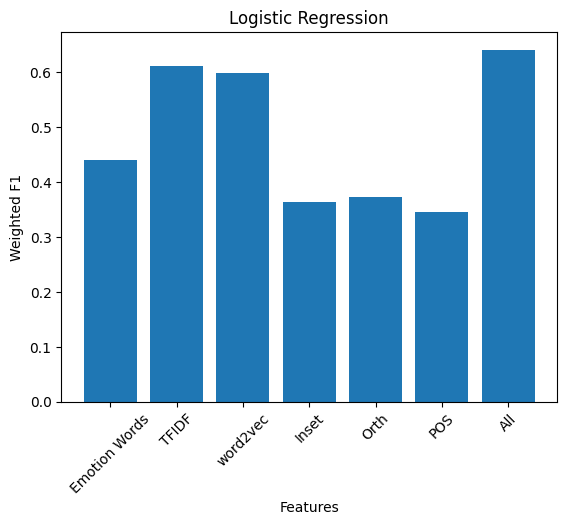

[[0.4898 0.5531 0.3573 0.3231 0.3063 0.3226 0.5206]
 [list([DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400)])
  list([DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400)])
  list([DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400)])
  list([DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifier(min_samples_split=400), DecisionTreeClassifi

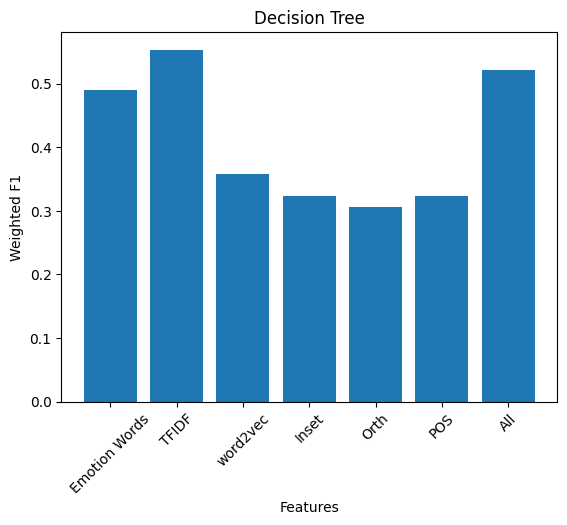

[[0.4023 0.5162 0.5177 0.4001 0.4002 0.348 0.5522]
 [list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1)])
  list([MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), MultinomialNB(alpha=0.1), Mul

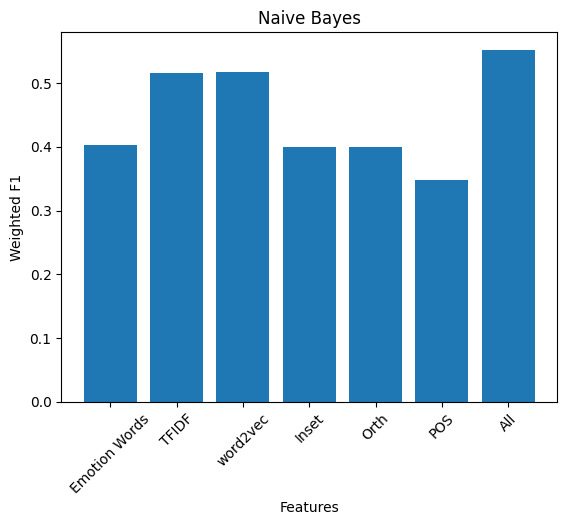

[[0.4292 0.2554 0.5476 0.2926 0.2673 0.276 0.5709]
 [list([KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1)])
  list([KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1)])
  list([KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1)])
  list([KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1), KNeighborsClassifi

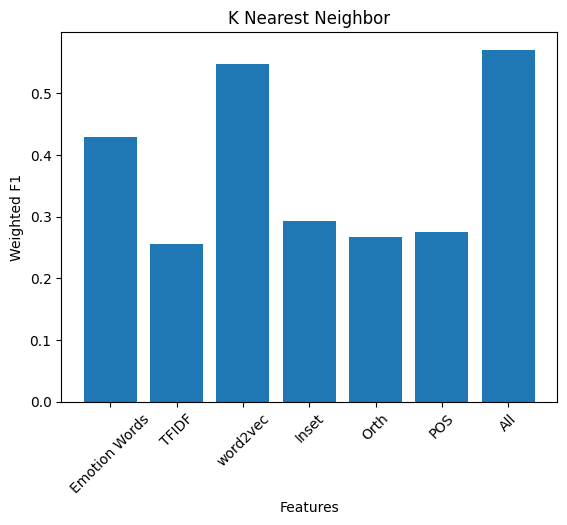

In [ ]:
# pd.concat([series["Log Res"].rename(name) for name, series in dict_res.items()], axis=1)
import os
dict_alg_df = {
    "Log Res":[],
    "decision tree":[],
    "nb":[],
    "knn":[]
}
list_name = ["Logistic Regression", "Decision Tree", "Naive Bayes", "K Nearest Neighbor"]
for name, df in dict_res.items():
    for model_name in dict_alg_df.keys():
        dict_alg_df[model_name].append(dict_res[name][model_name].rename(name))

try:
    os.mkdir("res_alg")
except:
    print()
for i,model_name in enumerate( dict_alg_df.keys()):
    dict_alg_df[model_name] = (pd.concat(dict_alg_df[model_name], axis=1))
    dict_alg_df[model_name].to_csv("res_alg/{}_res.csv".format(model_name))
    print(dict_alg_df[model_name].values)
    plt.bar(dict_alg_df[model_name].columns,dict_alg_df[model_name].values[0])
    plt.xticks(rotation=45)
    plt.xlabel("Features")
    plt.ylabel("Weighted F1")
    plt.title(list_name[i])
    plt.show()
    plt.close()


# Why TF IDF and Logistic Regression did well?

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression #Log Res

from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB #naive bayes
from sklearn.neighbors import KNeighborsClassifier #knn

from sklearn import metrics

#Dataset
orth_df = pd.read_csv("orth_df.csv")
raw_tweets = pd.read_csv("raw_tweets.csv")
tfidf_df = pd.read_csv("tfidf_df.csv")
word_vec_df = pd.read_csv("word_vec_df.csv")
pos_df = pd.read_csv("pos_df.csv")
tfidf_all_df = pd.read_csv("tfidf_all_df.csv")

# TF IDF score compacted
tfidf_sklearn_df = pd.read_csv("tfidf_sklearn.csv")

emotion_words = raw_tweets[["jml_love","jml_anger","jml_joy","jml_fear","jml_sadness"]]
inset_score = raw_tweets[["pos_val","pos_neg"]] #Value positive dan negative
basic_df = pd.concat([emotion_words,tfidf_df, word_vec_df], axis=1)

all_df = [emotion_words,
        tfidf_df,
        word_vec_df,
        inset_score,
        orth_df,
        pos_df,
        pd.concat([basic_df, inset_score, orth_df, pos_df], axis=1),
        ]
## Contoh Tabel
index=["Emotion Words", "TFIDF", "word2vec", "Inset", "Orth", "POS", "All"]
columns=["LogRes", "DecisionTrees", "NaiveBayes", "KNN"]


In [ ]:
import os
if ("tfidf_plot_per_tweet" not in os.listdir()):
    os.mkdir("tfidf_plot_per_tweet")

In [ ]:
ten_tfidf_mean = tfidf_df.mean().sort_values(ascending=False)[:10]
ten_tfidf_mean

username    0.025561
cinta       0.016668
orang       0.016212
ya          0.014932
sayang      0.014219
takut       0.011800
url         0.011730
sih         0.008918
hati        0.008887
teman       0.008848
dtype: float64

In [ ]:
tfidf_df.mean().sort_values( )[:10]

sorang            0.000027
puluan            0.000027
charain           0.000033
kangentingting    0.000033
biskuit           0.000033
hmmmmm            0.000035
bejibun           0.000036
soksokan          0.000037
pray              0.000037
pansol            0.000037
dtype: float64

In [ ]:
tfidf_df.astype(bool).sum(axis=0).sort_values(ascending=False)[:10]

username    1038
ya           703
url          614
orang        606
sayang       406
cinta        397
takut        356
sih          313
nya          297
suka         257
dtype: int64

In [ ]:
ten_tfidf_mean["username"]

0.025561303429347995

In [ ]:
all_res

[({'Log Res': [LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial'),
    LogisticRegression(C=0.1, multi_class='multinomial')],
   'decision tree': [DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400),
    DecisionTreeClassifier(min_samples_split=400)],
   'nb': [MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1),
    MultinomialNB(alpha=0.1)],
   'knn': [KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1),
    KNeighborsClassif

## Making the actual model (K-Fold models are just too many)

In [ ]:
from sklearn.model_selection import train_test_split

y = raw_tweets["label"]
le =  sklearn.preprocessing.LabelEncoder()
le.fit(y)
y_coded = le.transform(y)
print(le.transform(y.unique()))
def train_model(df:pd.DataFrame, y):
    x_train, x_test, y_train, y_test= train_test_split(df.to_numpy(), y, random_state=42)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    dict_res = {
        "x_train":x_train,
        "y_train":y_train,
        "x_test":x_test,
        "y_test":y_test
    }


    log_res = LogisticRegression(multi_class="multinomial", penalty="l2", solver="lbfgs", C=0.1)
    log_res.fit(X=x_train, y=y_train)
    dict_res["Log Res"]=log_res

        ## Decision Tree

    dec_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_split=400, splitter='best')
    dec_tree.fit(X=x_train, y=y_train)
    dict_res["decision tree"]=(dec_tree)

        ## Naive Bayes

    nb = MultinomialNB(alpha= 0.1)
    nb.fit(X=x_train, y=y_train)
    dict_res["nb"]=(nb)

        ## KNN
    knn = KNeighborsClassifier(n_neighbors=15, p=1, leaf_size=5)
    knn.fit(X=x_train, y=y_train)
    dict_res["knn"]=(knn)

    return dict_res



[0 2 4 3 1]


In [ ]:
le.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness'], dtype=object)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

all_df_res = [train_model(df, y_coded ) for df in all_df]

c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josep\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [ ]:
all_df_res[1]

{'x_train': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y_train': array([4, 1, 0, ..., 4, 0, 4]),
 'x_test': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y_test': array([1, 0, 4, ..., 2, 2, 4]),
 'Log Res': LogisticRegression(C=0.1, multi_class='multinomial'),
 'decision tree': DecisionTreeClassifier(min_samples_split=400),
 'nb': MultinomialNB(alpha=0.1),
 'knn': KNeighborsClassifier(leaf_size=5, n_neighbors=15, p=1)}

In [ ]:
all_df_res[1]["x_test"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(all_df_res[1]["x_test"], columns=tfidf_df.columns)

a   aa  aaa  aaaaaa  aaaaaaa  aaaaaaaaa  aaaaak  aaaahhh  aaah  \
0     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
2     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
3     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
4     0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
...   ...  ...  ...     ...      ...        ...     ...      ...   ...   
1096  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1097  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1098  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1099  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   
1100  0.0  0.0  0.0     0.0      0.0        0.0     0.0      0.0   0.0   

      aaahhhh  ...  zohri  zon  zona  zonasi  zone  zonk  zonkies  zonknya  \
0         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
2         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
3         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
4         0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
...       ...  ...    ...  ...   ...     ...   ...   ...      ...      ...   
1096      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1097      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1098      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1099      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   
1100      0.0  ...    0.0  0.0   0.0     0.0   0.0   0.0      0.0      0.0   

      zuhri  zulkifli  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  
...     ...       ...  
1096    0.0       0.0  
1097    0.0       0.0  
1098    0.0       0.0  
1099    0.0       0.0  
1100    0.0       0.0  

[1101 rows x 13177 columns]

## PDP

In [ ]:
log_res = all_df_res[1]["Log Res"]
log_res

LogisticRegression(C=0.1, multi_class='multinomial')

### Trying SKLearn plot

In [ ]:
raw_tweets["label"].unique()

array(['anger', 'happy', 'sadness', 'love', 'fear'], dtype=object)

Anger


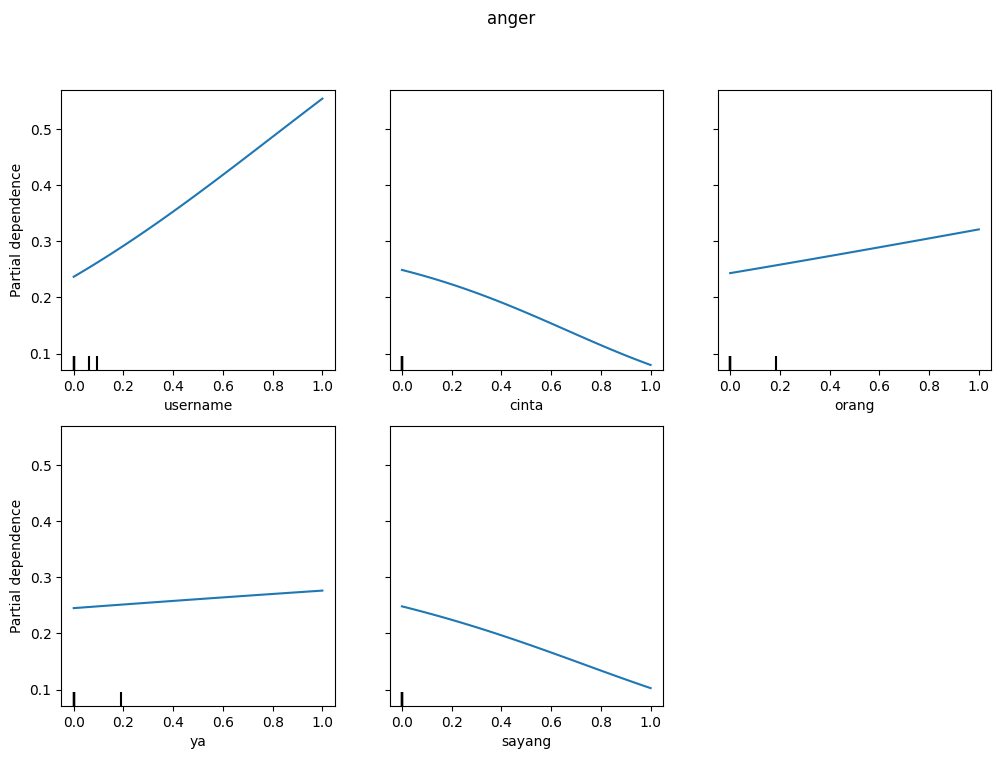

In [ ]:
def draw_pdp(list_idx, title, target, model=all_df_res[1]["Log Res"], feature=all_df_res[1]["x_train"] ):
    fig, ax = plt.subplots(figsize=(12,8))

    display = PartialDependenceDisplay.from_estimator(
            all_df_res[1]["Log Res"],
            feature, #TF IDF
            [index for index in list_idx],
            feature_names= tfidf_df.columns,
            target=target,
            percentiles=(0,1),
            ax=ax
            )

    display.figure_.suptitle(title)
print("Anger")
draw_pdp(
   ten_tfidf_mean.index[:5],
   raw_tweets["label"].unique()[0],
    0
)

Happy


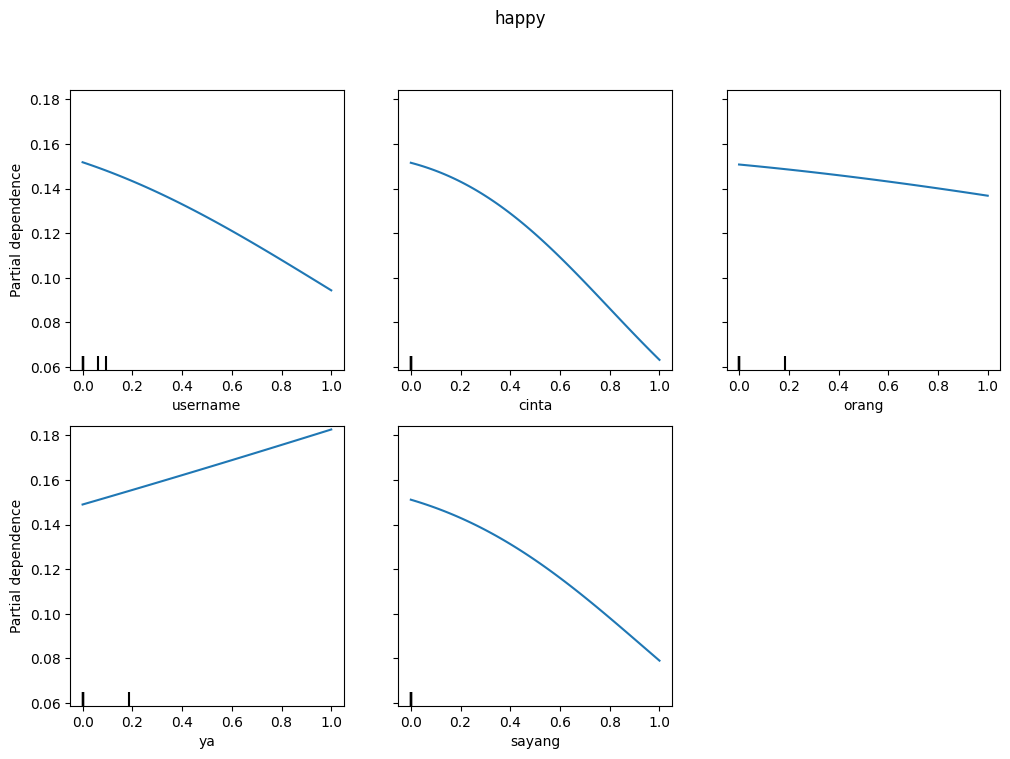

In [ ]:
print("Happy")
draw_pdp(
   ten_tfidf_mean.index[:5],
   raw_tweets["label"].unique()[1],
    1
)

Fear


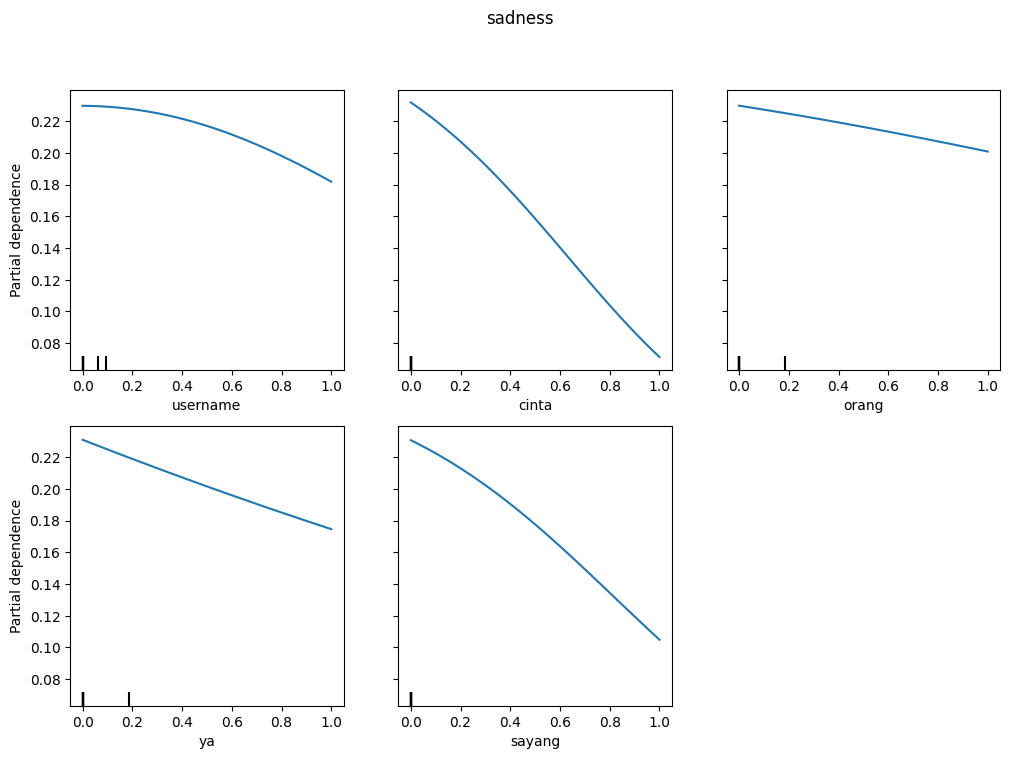

In [ ]:
print("Fear")
draw_pdp(
   ten_tfidf_mean.index[:5],
   raw_tweets["label"].unique()[2],
    2
)

Love


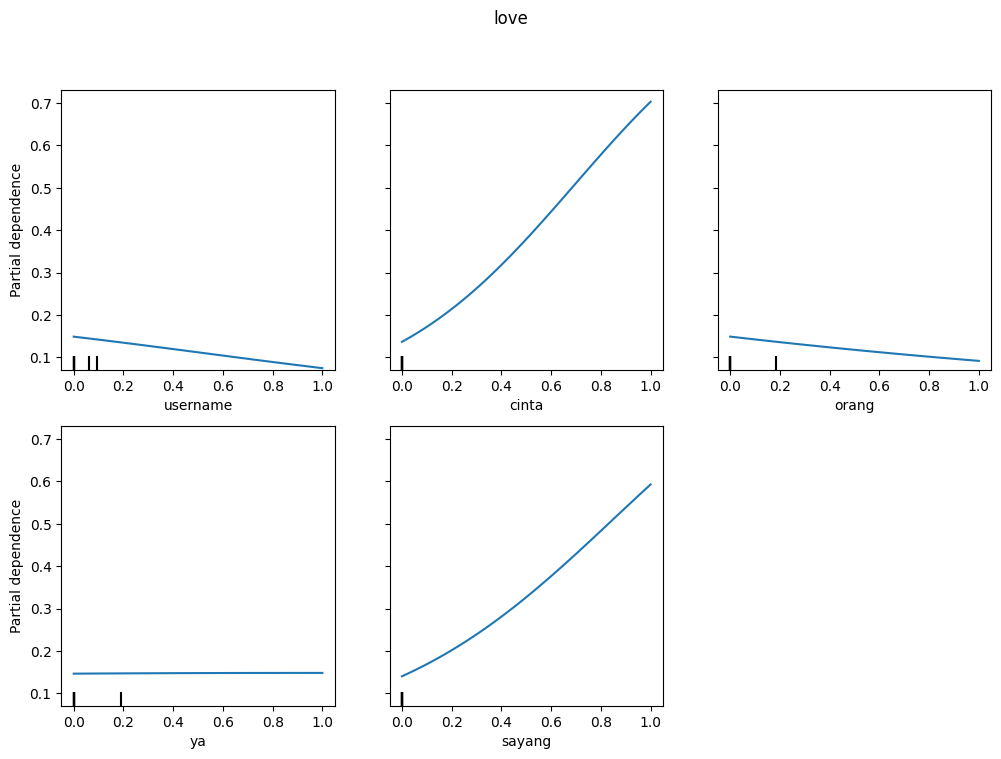

In [ ]:
print("Love")
draw_pdp(
   ten_tfidf_mean.index[:5],
   raw_tweets["label"].unique()[3],
    3
)

Sadness


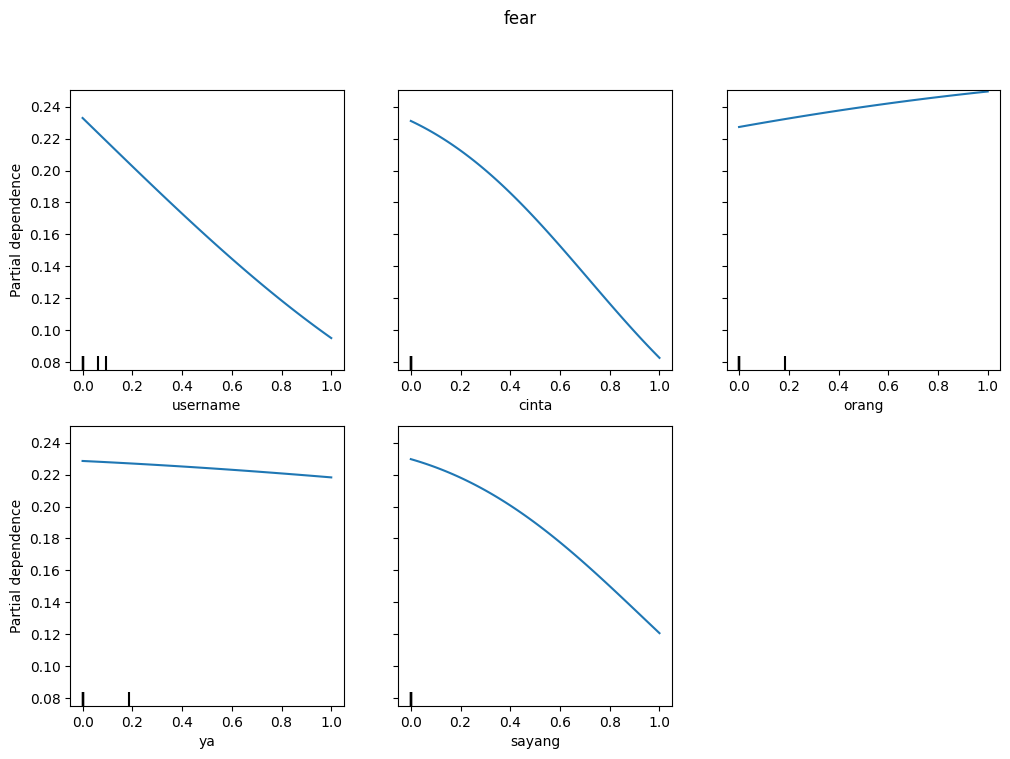

In [ ]:
print("Sadness")
draw_pdp(
   ten_tfidf_mean.index[:5],
   raw_tweets["label"].unique()[4],
    4
)

### Trying to plot F1 with tfidf gradual increase

#### Leaving filled values intact

Original f1 score is 0.6372535741309527


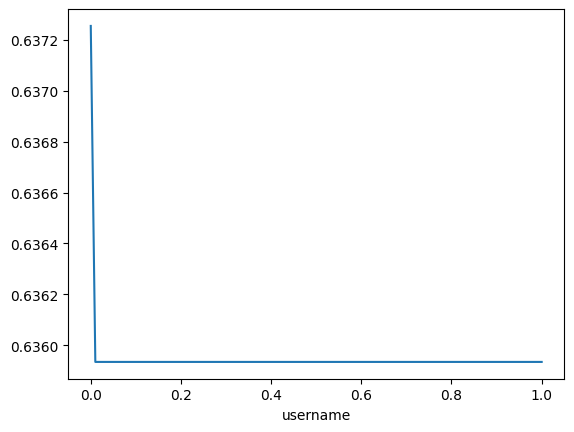

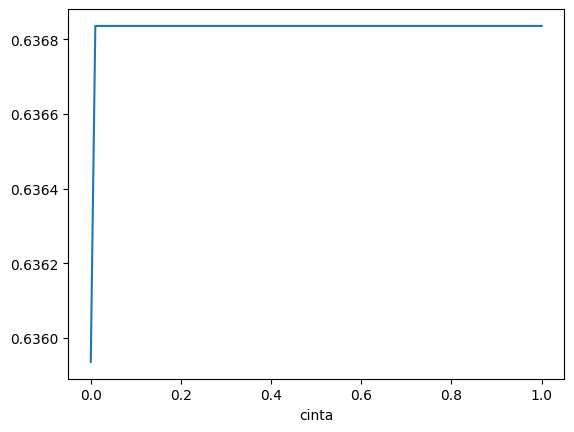

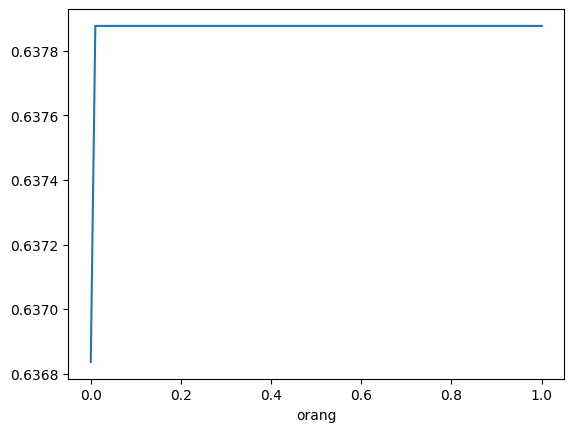

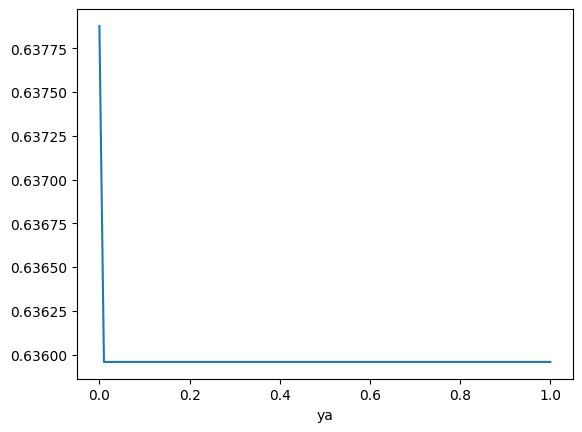

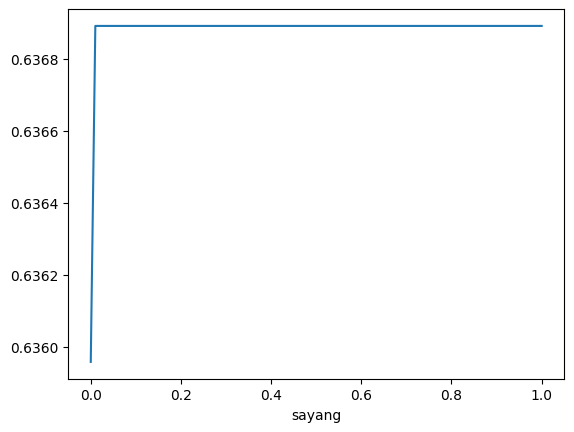

In [ ]:
from sklearn.metrics import f1_score
# sorted_mean_tfidf = all_df[1].mean().sort_values(ascending=False)[:10]
y_res_original = log_res.predict(all_df_res[1]["x_test"])
f1_original = f1_score(all_df_res[1]["y_test"], y_res_original, average="weighted")
print("Original f1 score is", f1_original)

def ascending_tfidf_score_res(feature):
    f1s = []
    range_score = np.linspace(0,1,num=100)
    for i in range_score:
        test_tfidf = pd.DataFrame(all_df_res[1]["x_test"], columns=tfidf_df.columns)
        test_tfidf[feature].replace(0. , i, inplace=True)
        y_res_modified = log_res.predict(test_tfidf.to_numpy())
        f1 = f1_score(all_df_res[1]["y_test"], y_res_modified,average="weighted")
        f1s.append(f1)
        # print("F1 score for word {} and tfidf {} : {}".format(feature, i, f1))
    plt.plot(range_score, f1s)
    plt.xlabel(feature)
    plt.show()
    plt.close()
    print()
    return f1s
_ = [ascending_tfidf_score_res(word) for word in ten_tfidf_mean.index[:5]]

#### Replacing all values in feature column

Original f1 score is 0.6368909923190857


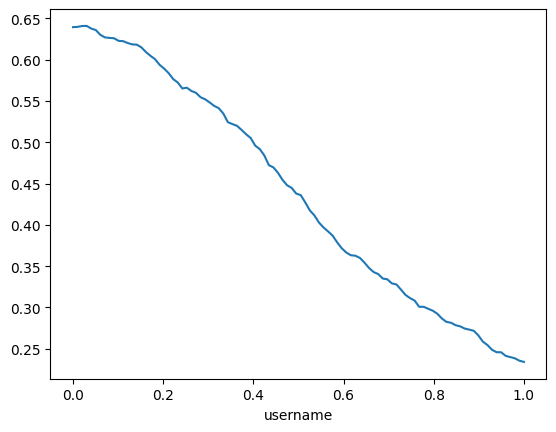

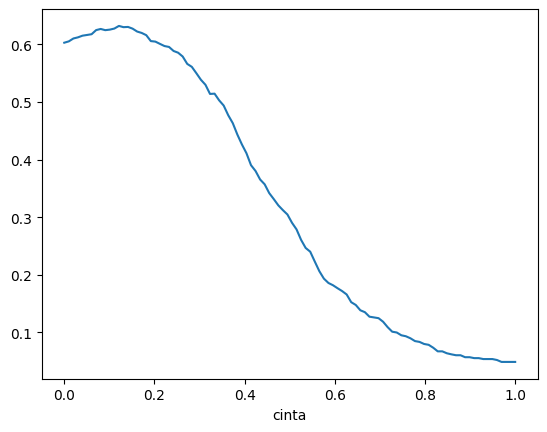

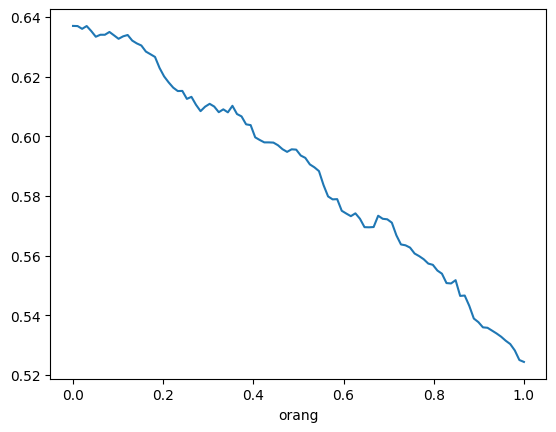

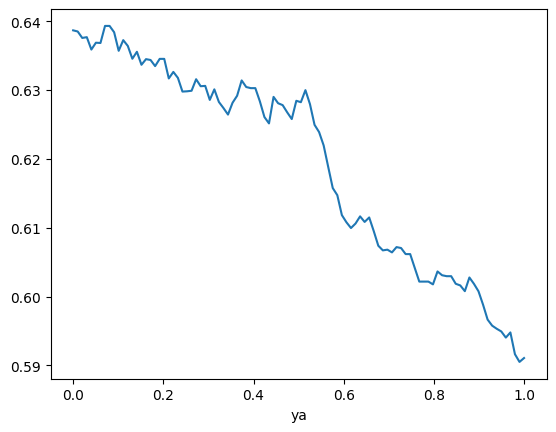

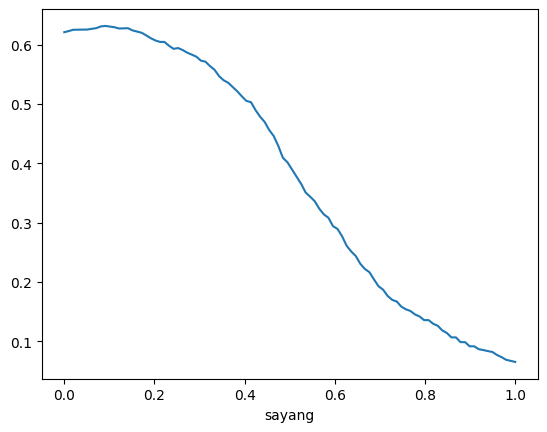

In [ ]:
from sklearn.metrics import f1_score
# sorted_mean_tfidf = all_df[1].mean().sort_values(ascending=False)[:10]
y_res_original = log_res.predict(all_df_res[1]["x_test"])
f1_original = f1_score(all_df_res[1]["y_test"], y_res_original, average="weighted")
print("Original f1 score is", f1_original)

def ascending_tfidf_score_res(feature):
    f1s = []
    range_score = np.linspace(0,1,num=100)
    for i in range_score:
        test_tfidf = pd.DataFrame(all_df_res[1]["x_test"], columns=tfidf_df.columns)
        test_tfidf[feature] =i
        y_res_modified = log_res.predict(test_tfidf.to_numpy())
        f1 = f1_score(all_df_res[1]["y_test"], y_res_modified,average="weighted")
        f1s.append(f1)
        # print("F1 score for word {} and tfidf {} : {}".format(feature, i, f1))
    plt.plot(range_score, f1s)
    plt.xlabel(feature)
    plt.show()
    plt.close()
    print()
    return f1s
_ = [ascending_tfidf_score_res(word) for word in ten_tfidf_mean.index[:5]]

#### F1 comparison with tfidf mean

In [ ]:
from sklearn.metrics import f1_score
sorted_mean_tfidf = all_df[1].mean().sort_values(ascending=False)[:10]
y_res_original = log_res.predict(all_df_res[1]["x_test"])
f1_original = f1_score(all_df_res[1]["y_test"], y_res_original, average="weighted")
print("Original f1 score is", f1_original)
def print_f1(sorted_word):
    f1s = []
    for word in sorted_word:
        test_tfidf = pd.DataFrame(all_df_res[1]["x_test"], columns=tfidf_df.columns)
        test_tfidf[word].replace(0.,tfidf_df.mean()[word], inplace=True)
        y_res_modified = log_res.predict(test_tfidf.to_numpy())
        f1 = f1_score(all_df_res[1]["y_test"], y_res_modified,average="weighted")
        f1s.append(f1)
        print("F1 score for word {} : {}".format(word, f1))
    return f1s
f1s = print_f1(sorted_mean_tfidf.index)

Original f1 score is 0.6368909923190857
F1 score for word username : 0.6368909923190857
F1 score for word cinta : 0.6368909923190857
F1 score for word orang : 0.6368909923190857
F1 score for word ya : 0.6368909923190857
F1 score for word sayang : 0.6368909923190857
F1 score for word takut : 0.635957916926549
F1 score for word url : 0.6347895909489764
F1 score for word sih : 0.6348033160724493
F1 score for word hati : 0.6367346006174522
F1 score for word teman : 0.6377104183557529


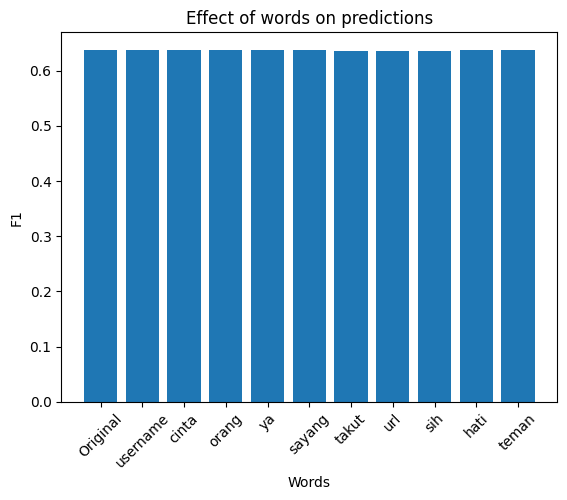

In [ ]:
plt.bar(["Original"] + sorted_mean_tfidf.index.tolist(), [f1_original] + f1s)
plt.xlabel("Words")
plt.xticks(rotation=45)
plt.ylabel("F1")
plt.title("Effect of words on predictions")
plt.show()
plt.close()

In [ ]:
tfidf_df.astype(bool).sum(axis=0).sort_values(ascending=False)[:10]

username    1038
ya           703
url          614
orang        606
sayang       406
cinta        397
takut        356
sih          313
nya          297
suka         257
dtype: int64

In [ ]:
f1s = print_f1(tfidf_df.astype(bool).sum(axis=0).sort_values(ascending=False)[:10].index)

F1 score for word username : 0.6377104183557529
F1 score for word ya : 0.6377104183557529
F1 score for word url : 0.6377104183557529
F1 score for word orang : 0.6377104183557529
F1 score for word sayang : 0.6377104183557529
F1 score for word cinta : 0.6377104183557529
F1 score for word takut : 0.6377104183557529
F1 score for word sih : 0.6377104183557529
F1 score for word nya : 0.6377104183557529
F1 score for word suka : 0.6377104183557529


In [ ]:
tfidf_numpy = all_df[1].to_numpy()
# for i,target in enumerate(['anger', 'fear', 'happy', 'love', 'sadness']):
#     print(target)
#     for j, feature_name in enumerate(all_df[1].columns):
#         PartialDependenceDisplay.from_estimator(
#                 all_df_res[1]["Log Res"],
#                 tfidf_numpy, #TF IDF
#                 [j],
#                 feature_names= all_df[1].columns,
#                 target=i,
#                 percentiles=(0,1)
#             )

## Log Res Interpret

In [ ]:
log_res_tfidf = all_df_res[1]["Log Res"]
log_res_tfidf.classes_,le.classes_,

(array([0, 1, 2, 3, 4]),
 array(['anger', 'fear', 'happy', 'love', 'sadness'], dtype=object))

In [ ]:
coeff = pd.DataFrame({
    'coefficient_anger': log_res_tfidf.coef_[0],
    'coefficient_fear': log_res_tfidf.coef_[1],
    'coefficient_happy': log_res_tfidf.coef_[2],
    'coefficient_love': log_res_tfidf.coef_[3],
    'coefficient_sadness': log_res_tfidf.coef_[4],

}, index=tfidf_df.columns)
coeff.to_csv("log_res_tfidf_coef.csv", index=False)
coeff

coefficient_anger  coefficient_fear  coefficient_happy  \
a                  0.011133          0.002726          -0.018659   
aa                -0.008914         -0.002407          -0.070489   
aaa               -0.014040         -0.008162           0.045551   
aaaaaa            -0.017499         -0.011461           0.061610   
aaaaaaa            0.072970         -0.010591          -0.027038   
...                     ...               ...                ...   
zonk               0.047760          0.010923          -0.051593   
zonkies           -0.017816         -0.010099           0.055255   
zonknya           -0.016747          0.061964          -0.018130   
zuhri             -0.019130         -0.008858          -0.025387   
zulkifli           0.000000          0.000000           0.000000   

          coefficient_love  coefficient_sadness  
a                 0.018625            -0.013825  
aa                0.059279             0.022532  
aaa              -0.009534            -0.013815  
aaaaaa           -0.014570            -0.018081  
aaaaaaa          -0.019978            -0.015363  
...                    ...                  ...  
zonk             -0.032805             0.025715  
zonkies          -0.013153            -0.014188  
zonknya          -0.010864            -0.016222  
zuhri            -0.012589             0.065965  
zulkifli          0.000000             0.000000  

[13177 rows x 5 columns]

In [ ]:
# for words in coeff["coefficient_anger"].sort_values(ascending=False)[:10].index:
#     print(PartialDependenceDisplay.from_estimator(
#         all_df_res[1]["Log Res"],
#         all_df[1].to_numpy(), #TF IDF
#         [i],
#         feature_names= all_df[1].columns,
#         target=2,
#         percentiles=(0,1)))

In [ ]:
coeff["coefficient_anger"].sort_values(ascending=False)[:21]

username     1.249930
via          0.501233
tolong       0.449826
gin          0.445379
tolol        0.444308
bayar        0.416203
mending      0.404929
laku         0.396453
vallen       0.389463
otak         0.389106
orang        0.386605
pancasila    0.372844
nyinyir      0.370371
kesal        0.367892
rakyat       0.361371
presiden     0.345308
sok          0.342549
jual         0.334389
bodoh        0.327422
bukti        0.326856
bro          0.319957
Name: coefficient_anger, dtype: float64

In [ ]:
f1s = print_f1(coeff["coefficient_anger"].sort_values(ascending=False)[:21].index)

F1 score for word username : 0.6377104183557529
F1 score for word via : 0.6376702545840209
F1 score for word tolong : 0.6367496465907873
F1 score for word gin : 0.6358129060100361
F1 score for word tolol : 0.6358129060100361
F1 score for word bayar : 0.6358129060100361
F1 score for word mending : 0.6358129060100361
F1 score for word laku : 0.6349275426954255
F1 score for word vallen : 0.6349833395771204
F1 score for word otak : 0.6349833395771204
F1 score for word orang : 0.6349833395771204
F1 score for word pancasila : 0.6357321453698945
F1 score for word nyinyir : 0.6357321453698945
F1 score for word kesal : 0.6357321453698945
F1 score for word rakyat : 0.6348076352156478
F1 score for word presiden : 0.6348271705694832
F1 score for word sok : 0.6348271705694832
F1 score for word jual : 0.6355751236137865
F1 score for word bodoh : 0.6355751236137865
F1 score for word bukti : 0.6355751236137865
F1 score for word bro : 0.6363224647012135


In [ ]:
coeff["coefficient_anger"].reset_index().sort_values(ascending=False, by="coefficient_anger")[:21].index

Int64Index([12590, 12648, 12158,  3876, 12156,  1083,  7200,  6312, 12627,
             8706,  8674,  8831,  8513,  5771,  9758,  9479, 11128,  5224,
             1507,  1691,  1621],
           dtype='int64')

In [ ]:
coeff["coefficient_fear"].sort_values(ascending=False)[:20]

takut        2.795148
seram        1.272381
ngeri        1.133714
parno        0.471480
askmf        0.471220
bahaya       0.467984
trauma       0.457395
pas          0.456574
gimana       0.444594
sih          0.390626
setan        0.316047
degan        0.312729
was          0.300196
besok        0.295190
bingung      0.293295
tadu         0.291726
malam        0.288930
horor        0.287078
hantu        0.282681
merinding    0.282277
Name: coefficient_fear, dtype: float64

In [ ]:
coeff["coefficient_happy"].sort_values(ascending=False)[:20]

alhamdulillah           0.831732
happy                   0.608496
moga                    0.602771
terima                  0.580623
url                     0.569112
selamat                 0.556258
oldmoneygakngerasain    0.460518
syukur                  0.443448
lancar                  0.435692
semangat                0.400733
bahagia                 0.391138
kasih                   0.385716
seru                    0.382249
wkwkwk                  0.371232
hahaha                  0.360078
lagu                    0.351844
nikmat                  0.340966
asik                    0.317503
terimakasih             0.314013
bahak                   0.311928
Name: coefficient_happy, dtype: float64

In [ ]:
coeff["coefficient_love"].sort_values(ascending=False)[:20]

cinta       2.292132
sayang      1.885599
jatuh       0.862177
papa        0.700499
i           0.590870
senyum      0.579530
ku          0.543686
kasih       0.524274
hati        0.506561
you         0.477567
peluk       0.468744
pokok       0.432878
untuk       0.401410
jaga        0.393520
mama        0.390910
indah       0.390121
doa         0.346117
rasa        0.330587
mu          0.329479
romantis    0.326352
Name: coefficient_love, dtype: float64

In [ ]:
coeff["coefficient_sadness"].sort_values(ascending=False)[:20]

sedih      0.576746
rindu      0.473006
pergi      0.472537
sekolah    0.464728
sakit      0.423453
putus      0.361801
tinggal    0.338068
susah      0.333191
ikhlas     0.327424
sepi       0.319319
paksa      0.310054
tahan      0.298833
sadar      0.296117
kasihan    0.285458
kangen     0.280772
hilang     0.275158
gagal      0.271131
asa        0.270181
miris      0.265039
minggu     0.249490
Name: coefficient_sadness, dtype: float64

In [ ]:
np.std(tfidf_numpy)

0.008707641970533427

Anger

Fear

Happy

Love

Sadness


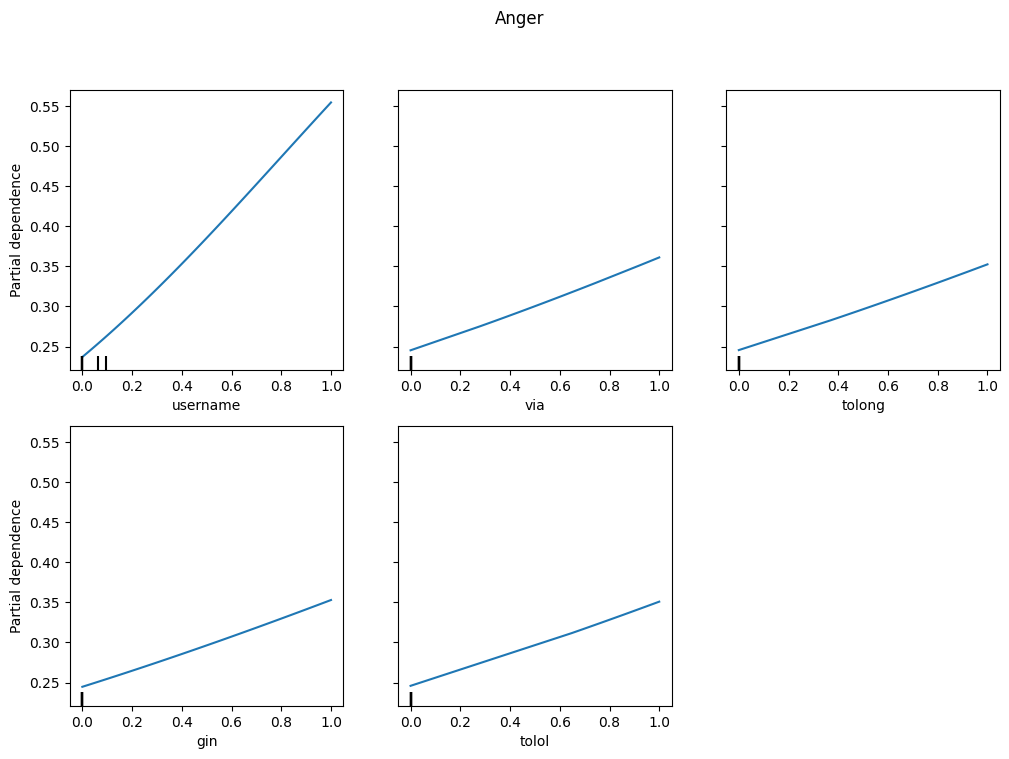

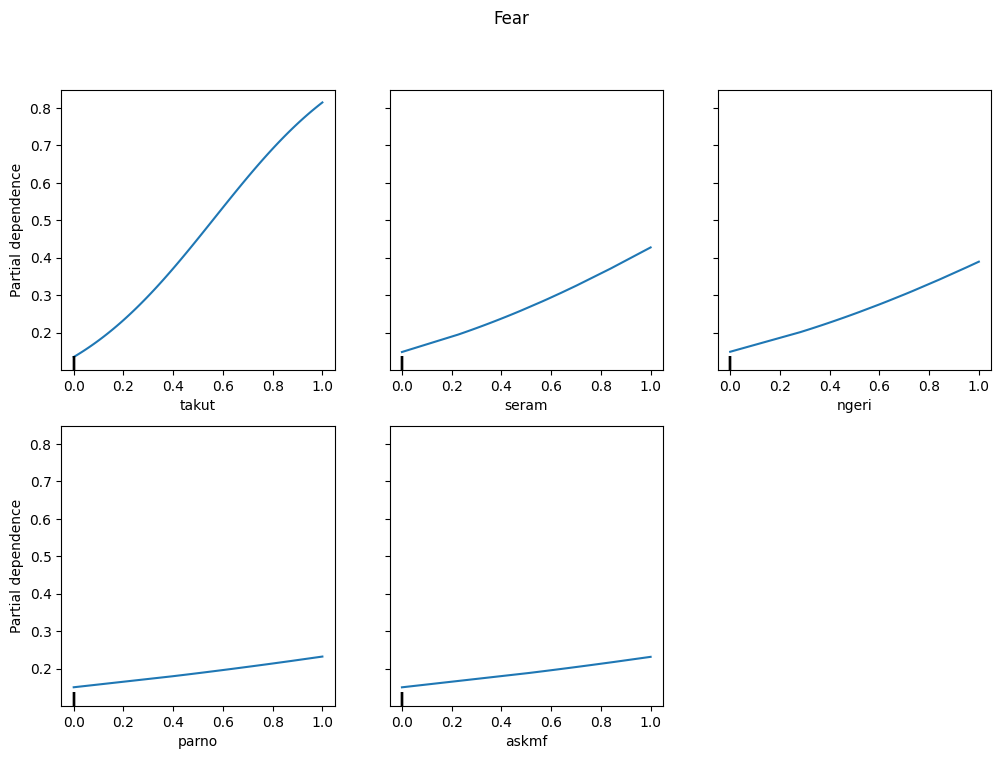

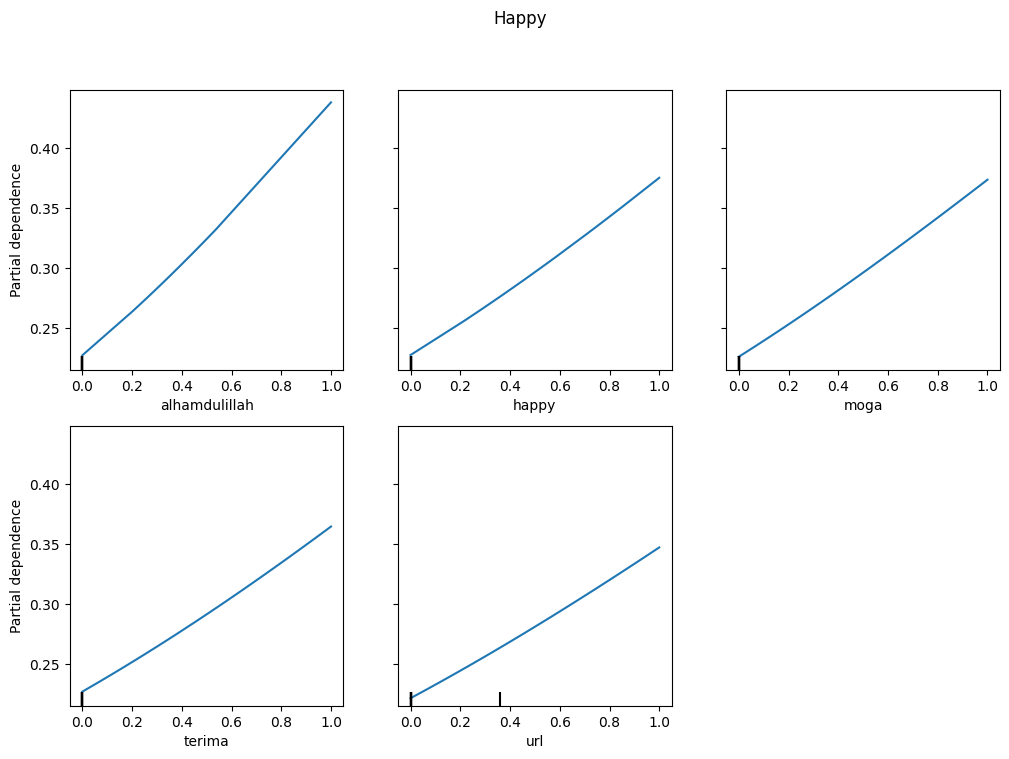

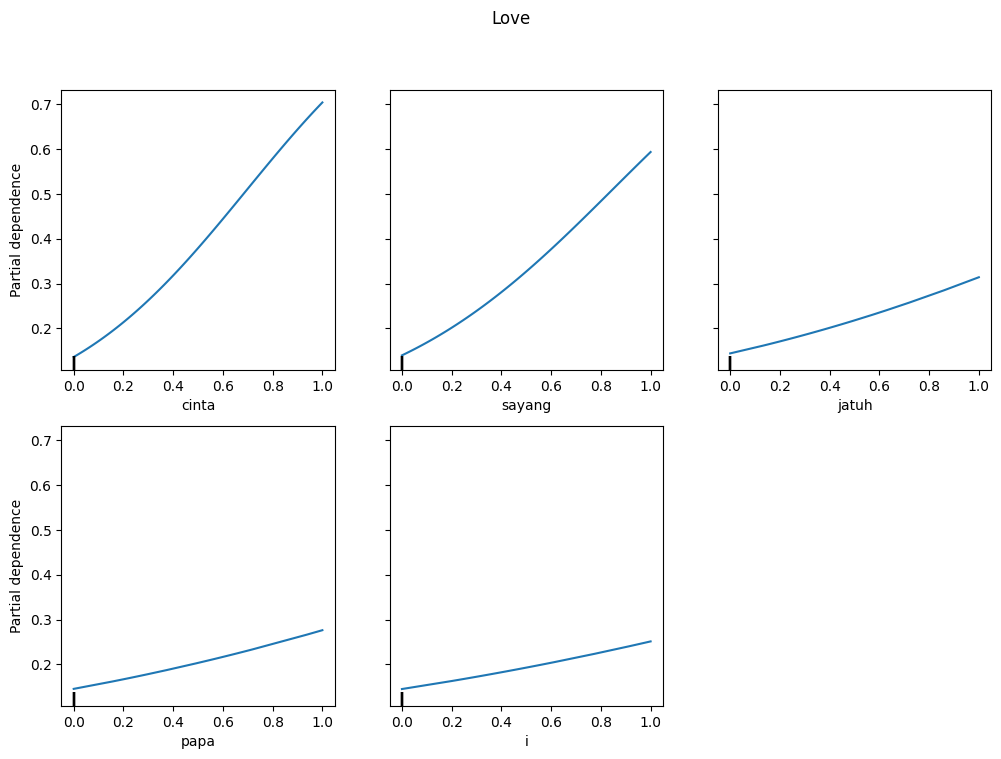

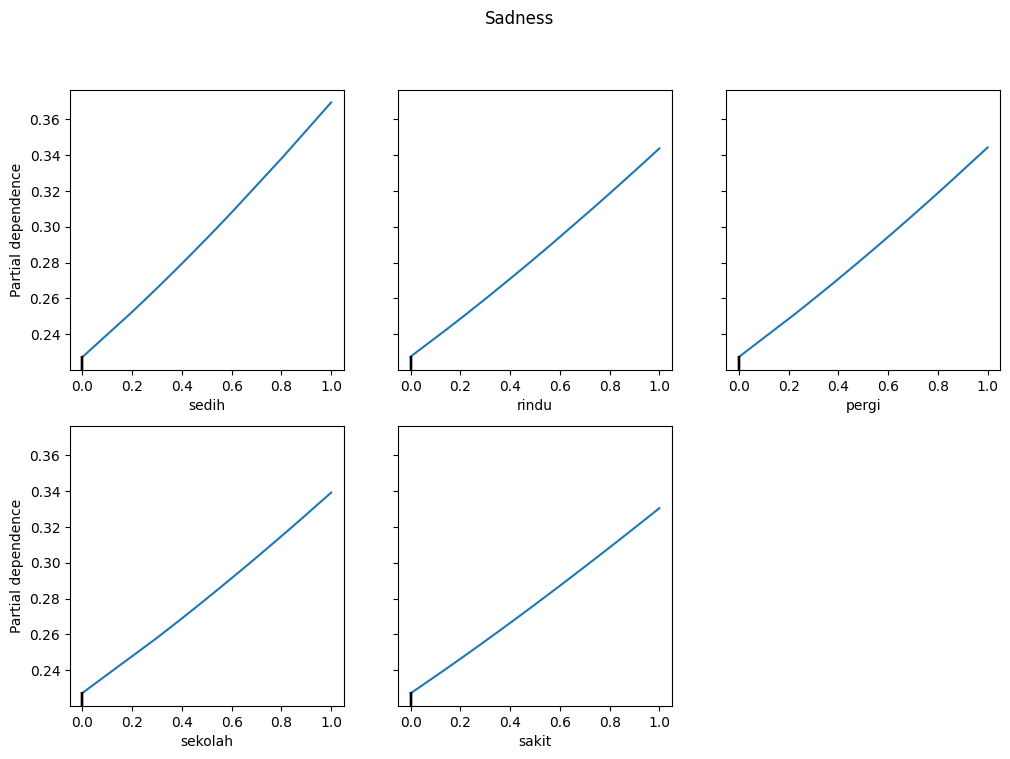

In [ ]:

print("Anger")
draw_pdp(
    coeff["coefficient_anger"].reset_index().sort_values(ascending=False, by="coefficient_anger")[:5].index,

   raw_tweets["label"].unique()[0],
    0
)
print()
print("Fear")
draw_pdp(
    coeff["coefficient_fear"].reset_index().sort_values(ascending=False, by="coefficient_fear")[:5].index,

   raw_tweets["label"].unique()[1],
    1
)
print()
print("Happy")
draw_pdp(
    coeff["coefficient_happy"].reset_index().sort_values(ascending=False, by="coefficient_happy")[:5].index,

   raw_tweets["label"].unique()[2],
    2
)
print()
print("Love")
draw_pdp(
    coeff["coefficient_love"].reset_index().sort_values(ascending=False, by="coefficient_love")[:5].index,

   raw_tweets["label"].unique()[3],
    3
)
print()
print("Sadness")
draw_pdp(
    coeff["coefficient_sadness"].reset_index().sort_values(ascending=False, by="coefficient_sadness")[:5].index,

   raw_tweets["label"].unique()[4],
    4
)